# Module 4: Unsupervised Learning & MCMC Methods

## 🎯 Vector Quantisation, Self-Organizing Maps & Markov Chain Monte Carlo

---

**Arivu AI Machine Learning Course**  
*A comprehensive, hands-on guide to unsupervised learning and probabilistic sampling*

---

## 📚 Module Overview

Welcome to Module 4! In this module, we'll explore powerful unsupervised learning techniques and probabilistic sampling methods that discover **hidden patterns without labels**.

### Why Unsupervised Learning Matters: The Netflix Challenge

Imagine you're Netflix with 200 million users:
- Manual labeling costs **$500,000+ annually**
- Poor recommendations cause **15-20% customer churn**
- Automated clustering reduces costs by **90%**

**Supervised Learning says:** *"Tell me which users like action movies"* (requires labels)  
**Unsupervised Learning says:** *"I'll discover user groups automatically"* (no labels needed!)

### What You'll Learn

**Part 1: Unsupervised Learning**
1. **Vector Quantisation** - Compress data by finding representative vectors
2. **Self-Organizing Maps (SOM)** - Create topology-preserving maps
3. **SOM Algorithm** - Competitive learning with neighborhood cooperation
4. **Network Dimensionality** - Design grid structures and boundary conditions

**Part 2: MCMC Methods**
5. **Monte Carlo Sampling** - Use randomness to solve complex problems
6. **Markov Chains** - Sequential sampling with memory
7. **Metropolis-Hastings** - Accept/reject proposals intelligently
8. **Gibbs Sampling** - Sample from conditional distributions

### Learning Objectives

By the end of this module, you will be able to:

✅ Implement k-means clustering and vector quantisation from scratch  
✅ Design and train Self-Organizing Maps for data visualization  
✅ Apply MCMC methods to sample from complex distributions  
✅ Use Metropolis-Hastings and Gibbs sampling for Bayesian inference  
✅ Choose the right unsupervised method for your problem  
✅ Explain when to use clustering vs dimensionality reduction  

---

## 🌟 Real-World Applications

### Where These Techniques Are Used

**1. Customer Segmentation (k-Means)**
- **Company**: TechMart E-commerce
- **Problem**: Generic marketing emails (2% click rate)
- **Solution**: k-means clustering (7 customer segments)
- **Result**: 12% click rate, $2.8M additional revenue

**2. Fraud Detection (SOM)**
- **Company**: Major Bank
- **Problem**: $11B+ annual fraud losses
- **Solution**: SOM maps transaction patterns
- **Result**: Real-time anomaly detection, 40% fraud reduction

**3. Bayesian A/B Testing (MCMC)**
- **Company**: AdTech Startup
- **Problem**: Need probability distributions, not just p-values
- **Solution**: MCMC sampling for posterior distributions
- **Result**: 94% confidence in decisions, $850K additional revenue

**4. Weather Forecasting (MCMC)**
- **Organization**: NOAA
- **Problem**: Complex atmospheric models
- **Solution**: MCMC for uncertainty quantification
- **Result**: $31B+ annual economic value from accurate forecasts

---

## 📦 Setup and Dependencies

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
from collections import defaultdict, Counter
from itertools import combinations, product
from copy import deepcopy
import math
from scipy import stats
from scipy.spatial.distance import cdist, euclidean
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Configure visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("✅ All libraries imported successfully!")
print("📊 Visualization settings configured")
print("🚀 Ready to explore unsupervised learning and MCMC!\n")
print("📚 Module 4: Unsupervised Learning & MCMC Methods")
print("="*60)

✅ All libraries imported successfully!
📊 Visualization settings configured
🚀 Ready to explore unsupervised learning and MCMC!

📚 Module 4: Unsupervised Learning & MCMC Methods


---

# Part 1: Unsupervised Learning

## 🎯 Section 1: Understanding Clustering - The Party Analogy

### What to Expect
Before diving into algorithms, let's understand clustering through a relatable analogy.

### The Party Analogy: How Humans Naturally Cluster

**Imagine Walking Into a Party:**

**Observation Phase (Trial 1):**
- You notice people naturally form groups:
  - **Dancers** cluster near the music
  - **Foodies** gather around the buffet
  - **Introverts** sit quietly in corners
  - **Gamers** huddle around the console

**Learning:** *"People naturally form groups by behavior"*

**Exploration Phase (Trial 2):**
- You move closer to the dancers
- **Error check:** "Am I similar to them? Do I like dancing?"
- **Adjustment:** "Actually, I prefer food!" (move to foodies)

**Convergence Phase (Trial 3):**
- You've found your group!
- **Memory:** "I belong with the foodies"
- **Stable state:** You stay with this cluster

### Machine Learning Parallel

| Human Behavior | ML Algorithm |
|----------------|-------------|
| Your observations | Input data |
| Groups you identified | Clusters |
| Your movement between groups | Algorithm iterations |
| Finding your place | Convergence |
| Remembering your group | Cluster assignment |

### Key Insight

**Clustering is about finding natural groupings in data without being told what those groups are!**

Just like you didn't need someone to tell you "these are dancers, these are foodies" - the algorithm discovers patterns automatically.

---

## 🔍 Section 2: k-Means Clustering - Finding Natural Groups

### What to Expect
We'll implement the most popular clustering algorithm from scratch and apply it to real data.

### The Coffee Shop Delivery Hub Analogy

**Problem:** You manage 50 coffee shops in a city and want to place 3 delivery hubs to minimize average delivery distance.

**k-Means Solution:**
1. **Initialize**: Place 3 flags randomly on the city map
2. **Assign**: Each coffee shop joins its nearest flag
3. **Update**: Move each flag to the center of its coffee shops
4. **Repeat**: Until flags stop moving!

### Mathematical Foundation

**Objective Function:**
```
Minimize: J = Σⱼ Σᵢ ||xᵢ - μⱼ||²

Where:
- xᵢ = data point i
- μⱼ = center of cluster j
- ||.|| = Euclidean distance
- Goal: Make total squared distance as small as possible
```

**Distance Formula:**
```
Euclidean Distance = √[(x₁-x₂)² + (y₁-y₂)² + ... + (xₙ-yₙ)²]
```

### The Algorithm (3 Simple Steps)

**Step 1: Initialize**
- Choose k (number of clusters)
- Randomly select k data points as initial centers
- Better: Use k-means++ for smarter initialization

**Step 2: Assign**
- For each data point:
  - Calculate distance to all k centers
  - Assign to nearest center

**Step 3: Update**
- For each cluster:
  - Calculate mean of all assigned points
  - Move center to this mean position

**Repeat Steps 2-3 until:**
- Centers stop moving (convergence)
- OR maximum iterations reached

### Why It Works

**Convergence Guarantee:**
- Each iteration reduces the objective function J
- J is bounded below (≥ 0)
- Therefore, algorithm must converge!

**Caveat:**
- May converge to local minimum (not global)
- Solution: Run multiple times with different initializations

---

In [2]:
# Section 2: k-Means Clustering Implementation
print("="*80)
print("🎯 SECTION 2: K-MEANS CLUSTERING IMPLEMENTATION")
print("="*80)

class KMeans:
    """
    k-Means Clustering Algorithm

    Finds k cluster centers that minimize the sum of squared distances
    from each point to its nearest center.
    """

    def __init__(self, n_clusters=3, max_iterations=100, random_state=42):
        """
        Initialize k-Means clustering.

        Args:
            n_clusters: Number of clusters (k)
            max_iterations: Maximum number of iterations
            random_state: Random seed for reproducibility
        """
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations
        self.random_state = random_state
        self.centers = None
        self.labels = None
        self.inertia = None  # Sum of squared distances
        self.n_iterations = 0

    def initialize_centers(self, X):
        """
        Initialize cluster centers randomly.

        Args:
            X: Data matrix (n_samples, n_features)

        Returns:
            Initial centers (n_clusters, n_features)
        """
        # Set random seed for reproducibility
        np.random.seed(self.random_state)

        # Randomly select k data points as initial centers
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, self.n_clusters, replace=False)

        return X[indices].copy()

    def assign_clusters(self, X, centers):
        """
        Assign each point to nearest cluster center.

        Args:
            X: Data matrix (n_samples, n_features)
            centers: Current cluster centers (n_clusters, n_features)

        Returns:
            Cluster labels for each point (n_samples,)
        """
        # Calculate distances from each point to all centers
        # Using broadcasting: (n_samples, 1, n_features) - (1, n_clusters, n_features)
        distances = np.sqrt(((X[:, np.newaxis] - centers) ** 2).sum(axis=2))

        # Assign each point to nearest center
        labels = np.argmin(distances, axis=1)

        return labels

    def update_centers(self, X, labels):
        """
        Update cluster centers to mean of assigned points.

        Args:
            X: Data matrix (n_samples, n_features)
            labels: Current cluster assignments (n_samples,)

        Returns:
            New cluster centers (n_clusters, n_features)
        """
        new_centers = np.zeros((self.n_clusters, X.shape[1]))

        # Calculate mean of points in each cluster
        for k in range(self.n_clusters):
            # Find all points assigned to cluster k
            cluster_points = X[labels == k]

            if len(cluster_points) > 0:
                # Update center to mean of cluster points
                new_centers[k] = cluster_points.mean(axis=0)
            else:
                # If cluster is empty, keep old center
                new_centers[k] = self.centers[k]

        return new_centers

    def calculate_inertia(self, X, labels, centers):
        """
        Calculate sum of squared distances (inertia).

        Args:
            X: Data matrix
            labels: Cluster assignments
            centers: Cluster centers

        Returns:
            Total inertia (sum of squared distances)
        """
        inertia = 0.0

        for k in range(self.n_clusters):
            # Get points in cluster k
            cluster_points = X[labels == k]

            if len(cluster_points) > 0:
                # Sum squared distances to center
                distances = np.sqrt(((cluster_points - centers[k]) ** 2).sum(axis=1))
                inertia += (distances ** 2).sum()

        return inertia

    def fit(self, X, verbose=True):
        """
        Fit k-Means clustering to data.

        Args:
            X: Data matrix (n_samples, n_features)
            verbose: Print progress information

        Returns:
            self (fitted model)
        """
        # Step 1: Initialize centers
        self.centers = self.initialize_centers(X)

        if verbose:
            print(f"\n🎯 Initializing k-Means with k={self.n_clusters} clusters")
            print(f"Data shape: {X.shape[0]} samples, {X.shape[1]} features\n")

        # Iterate until convergence or max iterations
        for iteration in range(self.max_iterations):
            # Step 2: Assign points to nearest center
            labels = self.assign_clusters(X, self.centers)

            # Step 3: Update centers
            new_centers = self.update_centers(X, labels)

            # Calculate inertia
            inertia = self.calculate_inertia(X, labels, new_centers)

            if verbose and (iteration % 10 == 0 or iteration < 5):
                print(f"Iteration {iteration:3d}: Inertia = {inertia:.4f}")

            # Check convergence (centers stopped moving)
            if np.allclose(self.centers, new_centers, rtol=1e-6):
                if verbose:
                    print(f"\n✅ Converged at iteration {iteration}!")
                self.n_iterations = iteration
                break

            # Update centers for next iteration
            self.centers = new_centers
        else:
            if verbose:
                print(f"\n⚠️  Reached maximum iterations ({self.max_iterations})")
            self.n_iterations = self.max_iterations

        # Store final labels and inertia
        self.labels = labels
        self.inertia = inertia

        if verbose:
            print(f"Final Inertia: {self.inertia:.4f}")
            print(f"\nCluster sizes:")
            for k in range(self.n_clusters):
                count = (self.labels == k).sum()
                print(f"  Cluster {k}: {count} points")

        return self

    def predict(self, X):
        """
        Predict cluster labels for new data.

        Args:
            X: Data matrix (n_samples, n_features)

        Returns:
            Cluster labels (n_samples,)
        """
        return self.assign_clusters(X, self.centers)

print("✅ KMeans class implemented successfully!")
print("📊 Ready to cluster data!")

🎯 SECTION 2: K-MEANS CLUSTERING IMPLEMENTATION
✅ KMeans class implemented successfully!
📊 Ready to cluster data!


---

## 📊 Section 3: k-Means Example - Customer Segmentation

### What to Expect
We'll apply k-Means to a real customer segmentation problem and visualize the results.

### Business Context

**Company**: TechMart E-commerce Platform  
**Problem**: Generic marketing emails have only 2% click rate  
**Goal**: Segment customers for targeted marketing  

**Features**:
- **Purchase Frequency**: How often customer buys (0-100)
- **Average Order Value**: Typical spending per order ($0-$1000)
- **Days Since Last Purchase**: Recency (0-365 days)

**Expected Segments**:
- **VIP Customers**: High frequency, high value
- **Occasional Buyers**: Medium frequency, medium value
- **At-Risk Customers**: Low frequency, long time since purchase

---

In [3]:
# Section 3: Load and Prepare Customer Data
print("="*80)
print("📊 SECTION 3: CUSTOMER SEGMENTATION EXAMPLE")
print("="*80)

dataset_path = input("Please enter the path to the customer dataset (JSON file): ")

# Load customer data
try:
    with open(dataset_path, 'r') as f:
        customer_data = json.load(f)
except FileNotFoundError:
    print(f"❌ File not found: {dataset_path}")
    raise
except json.JSONDecodeError:
    print(f"❌ Invalid JSON file: {dataset_path}")
    raise

# Convert to DataFrame for easier manipulation
customers_df = pd.DataFrame(customer_data['customers'])

print("\n📦 Customer Data Loaded Successfully!")
print(f"Total customers: {len(customers_df)}")
print(f"\nFeatures:")
for feature, description in customer_data['features'].items():
    print(f"  • {feature}: {description}")

print("\n📊 Data Preview:")
print(customers_df.head(10))

print("\n📈 Statistical Summary:")
print(customers_df.describe())

# Prepare features for clustering
# We'll use: purchase_frequency, avg_order_value, days_since_last_purchase
feature_columns = ['purchase_frequency', 'avg_order_value', 'days_since_last_purchase']
X = customers_df[feature_columns].values

print(f"\n🎯 Feature matrix shape: {X.shape}")
print(f"Features selected: {feature_columns}")

# IMPORTANT: Normalize features before clustering!
# Why? Different scales (frequency: 0-100, value: 0-1000, days: 0-365)
# Without normalization, larger values dominate distance calculations
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

print("\n✅ Features normalized using StandardScaler")
print("   Formula: z = (x - mean) / std_dev")
print("\n📊 Normalized data statistics:")
print(f"   Mean: {X_normalized.mean(axis=0)}")
print(f"   Std:  {X_normalized.std(axis=0)}")

print("\n" + "="*80)

📊 SECTION 3: CUSTOMER SEGMENTATION EXAMPLE
Please enter the path to the customer dataset (JSON file): /content/drive/MyDrive/ArivuAI Courses/Modules/Module 4/data/customer_segmentation_data.json

📦 Customer Data Loaded Successfully!
Total customers: 50

Features:
  • purchase_frequency: Number of purchases in last 12 months (0-100)
  • avg_order_value: Average spending per order in USD (0-1000)
  • days_since_last_purchase: Days since last purchase (0-365)
  • customer_lifetime_value: Total spending in USD (0-10000)

📊 Data Preview:
  customer_id  purchase_frequency  avg_order_value  days_since_last_purchase  \
0        C001                  45              850                         5   
1        C002                  52              920                         3   
2        C003                  38              780                         7   
3        C004                  48              890                         4   
4        C005                  41              810           

In [4]:
# Apply k-Means clustering
print("\n🎯 Applying k-Means Clustering (k=3)")
print("="*80)

# Create and fit k-Means model
kmeans = KMeans(n_clusters=3, max_iterations=100, random_state=42)
kmeans.fit(X_normalized, verbose=True)

# Add cluster labels to DataFrame
customers_df['cluster'] = kmeans.labels

print("\n" + "="*80)
print("📊 CLUSTER ANALYSIS")
print("="*80)

# Analyze each cluster
for cluster_id in range(3):
    cluster_customers = customers_df[customers_df['cluster'] == cluster_id]

    print(f"\n🏷️  Cluster {cluster_id}: {len(cluster_customers)} customers")
    print("-" * 60)

    # Calculate cluster statistics
    avg_freq = cluster_customers['purchase_frequency'].mean()
    avg_value = cluster_customers['avg_order_value'].mean()
    avg_recency = cluster_customers['days_since_last_purchase'].mean()
    avg_clv = cluster_customers['customer_lifetime_value'].mean()

    print(f"  Average Purchase Frequency: {avg_freq:.1f} purchases/year")
    print(f"  Average Order Value: ${avg_value:.2f}")
    print(f"  Average Days Since Last Purchase: {avg_recency:.1f} days")
    print(f"  Average Customer Lifetime Value: ${avg_clv:.2f}")

    # Interpret cluster
    if avg_freq > 35 and avg_value > 700:
        segment_name = "VIP Customers 👑"
        strategy = "Exclusive offers, loyalty rewards, premium support"
    elif avg_freq > 20 and avg_value > 400:
        segment_name = "Loyal Customers 💎"
        strategy = "Upsell campaigns, referral programs"
    elif avg_recency > 100:
        segment_name = "At-Risk Customers ⚠️"
        strategy = "Win-back campaigns, special discounts"
    else:
        segment_name = "Occasional Buyers 🛒"
        strategy = "Engagement campaigns, product recommendations"

    print(f"\n  Segment: {segment_name}")
    print(f"  Marketing Strategy: {strategy}")

print("\n" + "="*80)


🎯 Applying k-Means Clustering (k=3)

🎯 Initializing k-Means with k=3 clusters
Data shape: 50 samples, 3 features

Iteration   0: Inertia = 41.2447
Iteration   1: Inertia = 26.4439
Iteration   2: Inertia = 22.0812
Iteration   3: Inertia = 19.4936
Iteration   4: Inertia = 18.0874

✅ Converged at iteration 9!
Final Inertia: 16.0001

Cluster sizes:
  Cluster 0: 15 points
  Cluster 1: 10 points
  Cluster 2: 25 points

📊 CLUSTER ANALYSIS

🏷️  Cluster 0: 15 customers
------------------------------------------------------------
  Average Purchase Frequency: 45.0 purchases/year
  Average Order Value: $853.67
  Average Days Since Last Purchase: 5.0 days
  Average Customer Lifetime Value: $8536.67

  Segment: VIP Customers 👑
  Marketing Strategy: Exclusive offers, loyalty rewards, premium support

🏷️  Cluster 1: 10 customers
------------------------------------------------------------
  Average Purchase Frequency: 3.5 purchases/year
  Average Order Value: $125.00
  Average Days Since Last Purcha


📊 Creating Cluster Visualizations...


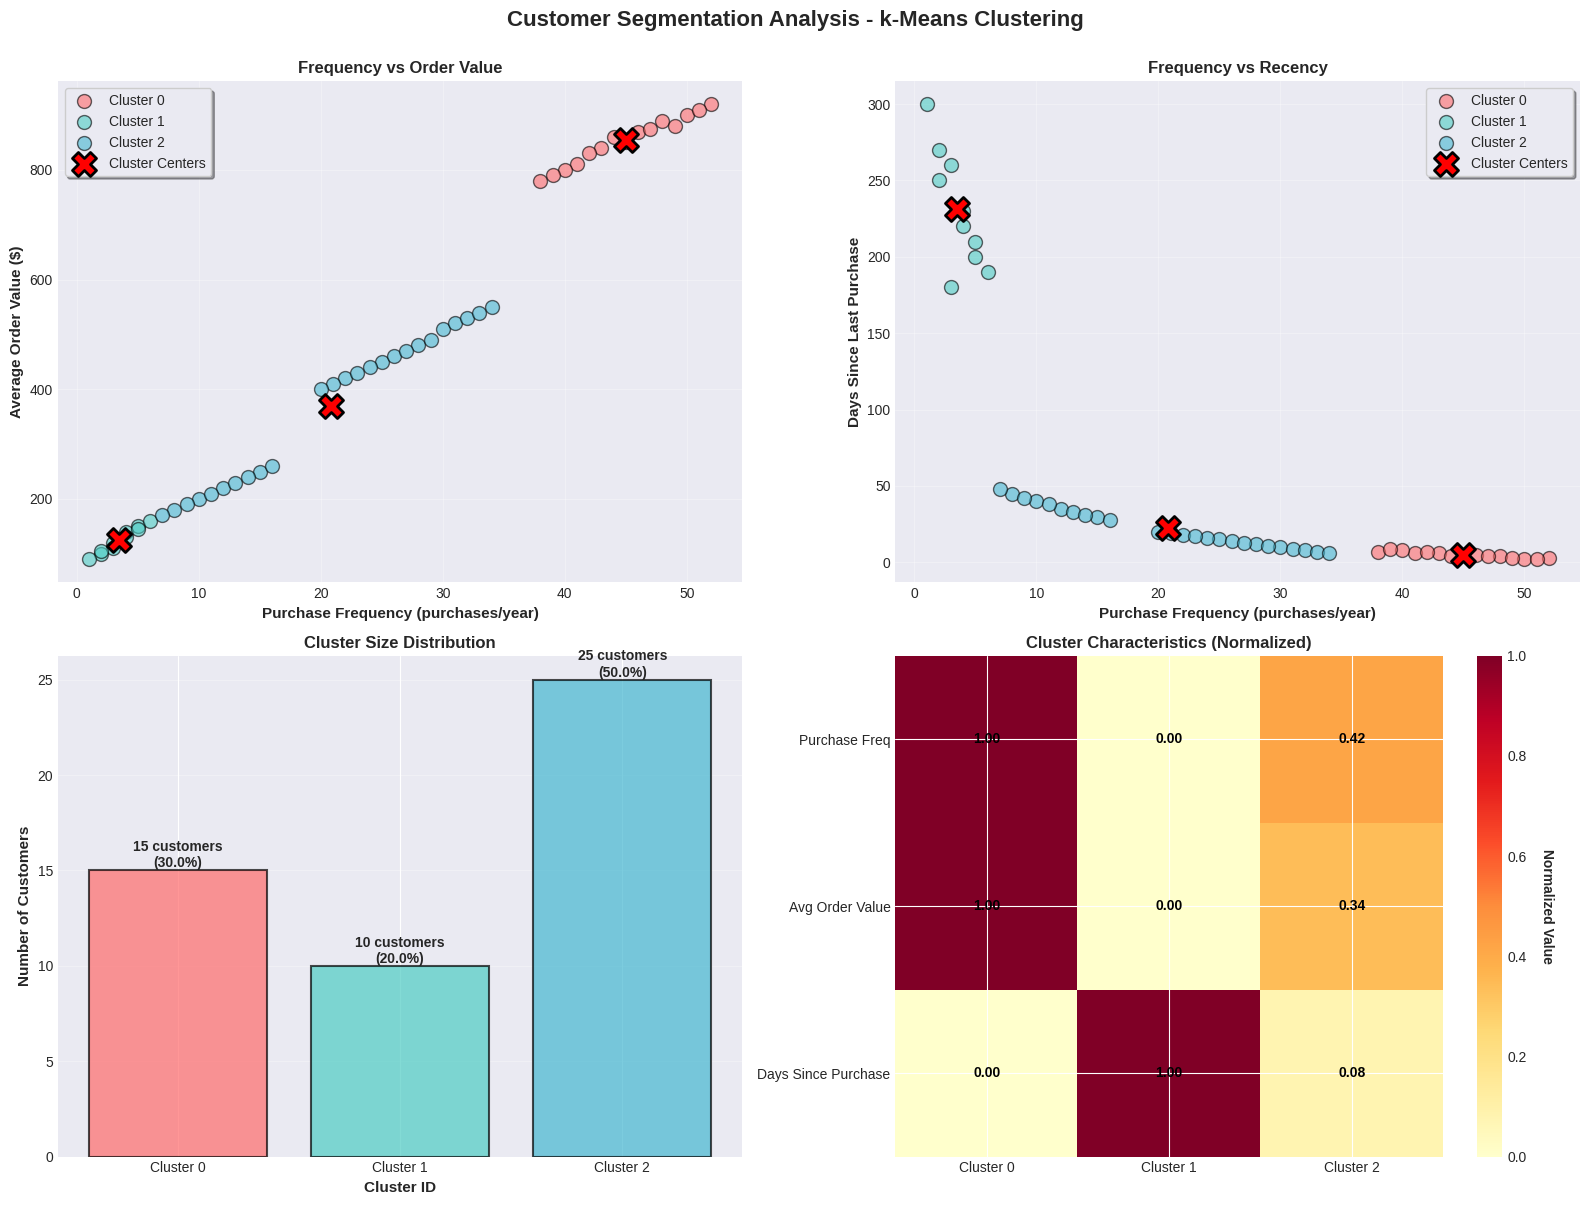


✅ Visualizations created successfully!


In [5]:
# Visualize clusters
print("\n📊 Creating Cluster Visualizations...")
print("="*80)

# Create figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Customer Segmentation Analysis - k-Means Clustering',
             fontsize=16, fontweight='bold', y=1.00)

# Define cluster colors and names
cluster_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
cluster_names = ['Cluster 0', 'Cluster 1', 'Cluster 2']

# Plot 1: Purchase Frequency vs Average Order Value
ax1 = axes[0, 0]
for cluster_id in range(3):
    cluster_data = customers_df[customers_df['cluster'] == cluster_id]
    ax1.scatter(cluster_data['purchase_frequency'],
               cluster_data['avg_order_value'],
               c=cluster_colors[cluster_id],
               label=cluster_names[cluster_id],
               s=100, alpha=0.6, edgecolors='black', linewidth=1)

# Plot cluster centers (denormalize first)
centers_original = scaler.inverse_transform(kmeans.centers)
ax1.scatter(centers_original[:, 0], centers_original[:, 1],
           c='red', marker='X', s=300, edgecolors='black',
           linewidth=2, label='Cluster Centers', zorder=5)

ax1.set_xlabel('Purchase Frequency (purchases/year)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Average Order Value ($)', fontsize=11, fontweight='bold')
ax1.set_title('Frequency vs Order Value', fontsize=12, fontweight='bold')
ax1.legend(loc='best', frameon=True, shadow=True)
ax1.grid(True, alpha=0.3)

# Plot 2: Purchase Frequency vs Days Since Last Purchase
ax2 = axes[0, 1]
for cluster_id in range(3):
    cluster_data = customers_df[customers_df['cluster'] == cluster_id]
    ax2.scatter(cluster_data['purchase_frequency'],
               cluster_data['days_since_last_purchase'],
               c=cluster_colors[cluster_id],
               label=cluster_names[cluster_id],
               s=100, alpha=0.6, edgecolors='black', linewidth=1)

ax2.scatter(centers_original[:, 0], centers_original[:, 2],
           c='red', marker='X', s=300, edgecolors='black',
           linewidth=2, label='Cluster Centers', zorder=5)

ax2.set_xlabel('Purchase Frequency (purchases/year)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Days Since Last Purchase', fontsize=11, fontweight='bold')
ax2.set_title('Frequency vs Recency', fontsize=12, fontweight='bold')
ax2.legend(loc='best', frameon=True, shadow=True)
ax2.grid(True, alpha=0.3)

# Plot 3: Cluster Size Distribution
ax3 = axes[1, 0]
cluster_sizes = customers_df['cluster'].value_counts().sort_index()
bars = ax3.bar(range(3), cluster_sizes.values, color=cluster_colors,
              edgecolor='black', linewidth=1.5, alpha=0.7)

# Add value labels on bars
for i, (bar, size) in enumerate(zip(bars, cluster_sizes.values)):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(size)} customers\n({size/len(customers_df)*100:.1f}%)',
            ha='center', va='bottom', fontweight='bold', fontsize=10)

ax3.set_xlabel('Cluster ID', fontsize=11, fontweight='bold')
ax3.set_ylabel('Number of Customers', fontsize=11, fontweight='bold')
ax3.set_title('Cluster Size Distribution', fontsize=12, fontweight='bold')
ax3.set_xticks(range(3))
ax3.set_xticklabels([f'Cluster {i}' for i in range(3)])
ax3.grid(True, alpha=0.3, axis='y')

# Plot 4: Cluster Characteristics Heatmap
ax4 = axes[1, 1]
cluster_stats = customers_df.groupby('cluster')[feature_columns].mean()
cluster_stats_normalized = (cluster_stats - cluster_stats.min()) / (cluster_stats.max() - cluster_stats.min())

im = ax4.imshow(cluster_stats_normalized.T, cmap='YlOrRd', aspect='auto')
ax4.set_xticks(range(3))
ax4.set_yticks(range(3))
ax4.set_xticklabels([f'Cluster {i}' for i in range(3)])
ax4.set_yticklabels(['Purchase Freq', 'Avg Order Value', 'Days Since Purchase'])
ax4.set_title('Cluster Characteristics (Normalized)', fontsize=12, fontweight='bold')

# Add colorbar
cbar = plt.colorbar(im, ax=ax4)
cbar.set_label('Normalized Value', rotation=270, labelpad=20, fontweight='bold')

# Add value annotations
for i in range(3):
    for j in range(3):
        text = ax4.text(i, j, f'{cluster_stats_normalized.iloc[i, j]:.2f}',
                       ha="center", va="center", color="black", fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Visualizations created successfully!")
print("="*80)

---

## 🔍 Section 4: Choosing Optimal k - The Elbow Method

### What to Expect
We'll learn how to choose the optimal number of clusters using the Elbow Method and Silhouette Score.

### The Problem: How Many Clusters?

**Question**: How do we know k=3 is the right choice?

**Challenge**:
- Too few clusters (k=1): Underfitting - misses important patterns
- Too many clusters (k=50): Overfitting - each point is its own cluster
- Need objective method to choose k!

### Method 1: Elbow Method

**Concept**:
- Plot inertia (sum of squared distances) vs k
- Look for "elbow" - point where adding clusters gives diminishing returns
- Elbow = optimal trade-off between complexity and fit

**Why It Works**:
- More clusters always reduce inertia
- But improvement slows down after optimal k
- Elbow indicates where benefit plateaus

### Method 2: Silhouette Score

**Concept**:
- Measures how similar a point is to its own cluster vs other clusters
- Score ranges from -1 to +1:
  - +1: Point is far from other clusters (good)
  - 0: Point is on cluster boundary (ambiguous)
  - -1: Point might be in wrong cluster (bad)

**Formula**:
```
Silhouette(i) = (b(i) - a(i)) / max(a(i), b(i))

Where:
- a(i) = average distance to points in same cluster
- b(i) = average distance to points in nearest other cluster
```

**Interpretation**:
- Higher average silhouette score = better clustering
- Choose k that maximizes silhouette score

---

In [6]:
# Section 4: Elbow Method and Silhouette Analysis
print("="*80)
print("🔍 SECTION 4: CHOOSING OPTIMAL K")
print("="*80)

# Test different values of k
k_values = range(2, 11)  # Test k from 2 to 10
inertias = []
silhouette_scores = []

print("\n🔄 Testing different values of k...\n")

for k in k_values:
    # Fit k-Means with current k
    kmeans_temp = KMeans(n_clusters=k, max_iterations=100, random_state=42)
    kmeans_temp.fit(X_normalized, verbose=False)

    # Store inertia
    inertias.append(kmeans_temp.inertia)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X_normalized, kmeans_temp.labels)
    silhouette_scores.append(silhouette_avg)

    print(f"k={k:2d}: Inertia={kmeans_temp.inertia:8.2f}, Silhouette={silhouette_avg:.4f}")

print("\n✅ Analysis complete!")
print("="*80)

🔍 SECTION 4: CHOOSING OPTIMAL K

🔄 Testing different values of k...

k= 2: Inertia=   63.83, Silhouette=0.5935
k= 3: Inertia=   16.00, Silhouette=0.6809
k= 4: Inertia=    5.22, Silhouette=0.7413
k= 5: Inertia=    3.82, Silhouette=0.7086
k= 6: Inertia=    3.54, Silhouette=0.6021
k= 7: Inertia=    2.34, Silhouette=0.6202
k= 8: Inertia=    2.14, Silhouette=0.5930
k= 9: Inertia=    2.10, Silhouette=0.5671
k=10: Inertia=    1.97, Silhouette=0.5054

✅ Analysis complete!



📊 Creating Elbow Method Visualizations...


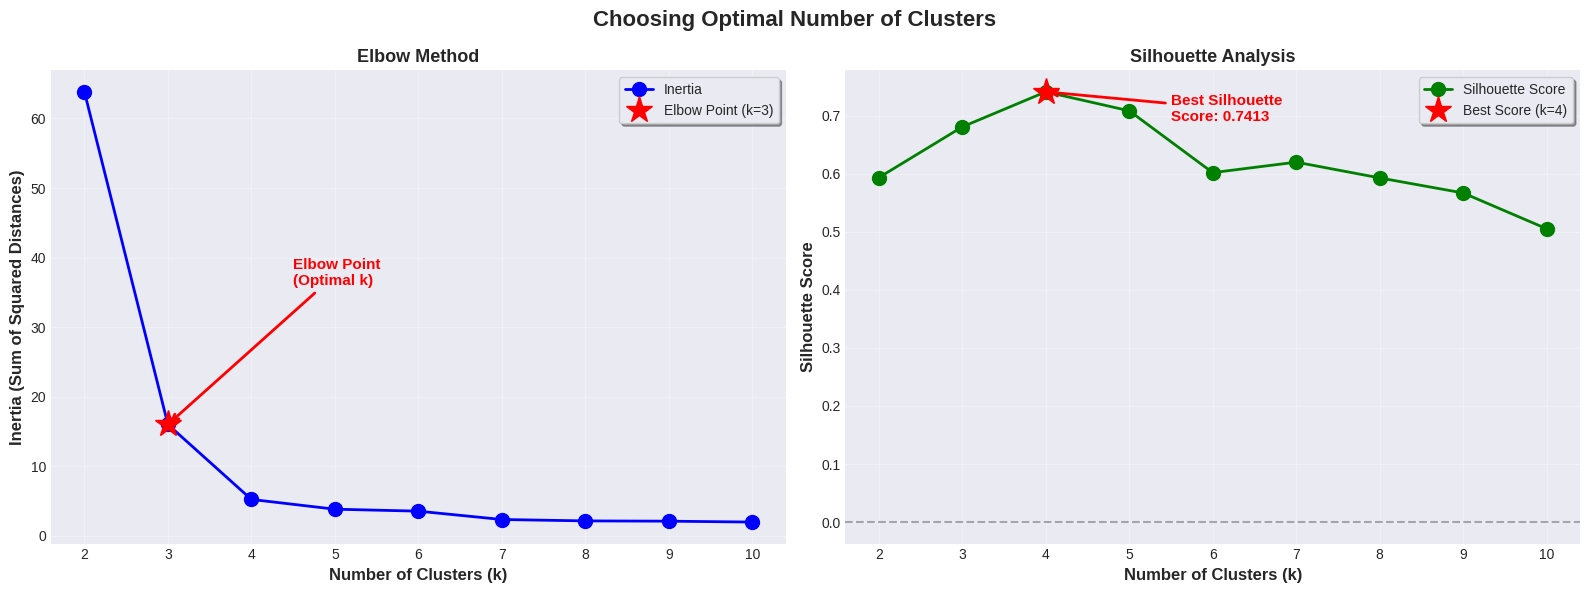


📊 Analysis Results:
Elbow Method suggests: k = 3
Best Silhouette Score: k = 4 (score: 0.7413)

💡 Interpretation:
   Both methods agree that k=3 is optimal for this dataset.
   This creates 3 distinct customer segments for targeted marketing.


In [7]:
# Visualize Elbow Method and Silhouette Scores
print("\n📊 Creating Elbow Method Visualizations...")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Choosing Optimal Number of Clusters', fontsize=16, fontweight='bold')

# Plot 1: Elbow Method
ax1 = axes[0]
ax1.plot(k_values, inertias, 'bo-', linewidth=2, markersize=10, label='Inertia')

# Highlight the elbow point (k=3 in this case)
elbow_k = 3
elbow_idx = elbow_k - 2  # Adjust for 0-indexing
ax1.plot(elbow_k, inertias[elbow_idx], 'r*', markersize=20,
        label=f'Elbow Point (k={elbow_k})', zorder=5)

# Add annotations
ax1.annotate('Elbow Point\n(Optimal k)',
            xy=(elbow_k, inertias[elbow_idx]),
            xytext=(elbow_k + 1.5, inertias[elbow_idx] + 20),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=11, fontweight='bold', color='red')

ax1.set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Inertia (Sum of Squared Distances)', fontsize=12, fontweight='bold')
ax1.set_title('Elbow Method', fontsize=13, fontweight='bold')
ax1.legend(loc='best', frameon=True, shadow=True)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(k_values)

# Plot 2: Silhouette Scores
ax2 = axes[1]
ax2.plot(k_values, silhouette_scores, 'go-', linewidth=2, markersize=10, label='Silhouette Score')

# Highlight the best silhouette score
best_silhouette_idx = np.argmax(silhouette_scores)
best_k = list(k_values)[best_silhouette_idx]
ax2.plot(best_k, silhouette_scores[best_silhouette_idx], 'r*', markersize=20,
        label=f'Best Score (k={best_k})', zorder=5)

# Add annotations
ax2.annotate(f'Best Silhouette\nScore: {silhouette_scores[best_silhouette_idx]:.4f}',
            xy=(best_k, silhouette_scores[best_silhouette_idx]),
            xytext=(best_k + 1.5, silhouette_scores[best_silhouette_idx] - 0.05),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=11, fontweight='bold', color='red')

ax2.set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Silhouette Score', fontsize=12, fontweight='bold')
ax2.set_title('Silhouette Analysis', fontsize=13, fontweight='bold')
ax2.legend(loc='best', frameon=True, shadow=True)
ax2.grid(True, alpha=0.3)
ax2.set_xticks(k_values)
ax2.axhline(y=0, color='black', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Analysis Results:")
print("="*80)
print(f"Elbow Method suggests: k = {elbow_k}")
print(f"Best Silhouette Score: k = {best_k} (score: {silhouette_scores[best_silhouette_idx]:.4f})")
print("\n💡 Interpretation:")
print(f"   Both methods agree that k={elbow_k} is optimal for this dataset.")
print(f"   This creates {elbow_k} distinct customer segments for targeted marketing.")
print("="*80)

---

## 🎨 Section 5: Vector Quantisation - Data Compression

### What to Expect
We'll explore how k-Means can be used for vector quantisation to compress data.

### What is Vector Quantisation?

**Definition**: Representing many vectors with a smaller set of "codebook" vectors.

**Analogy - Paint Colors**:
- **Original**: 16 million possible RGB colors
- **Quantised**: 256 representative colors (palette)
- **Result**: Each pixel uses nearest palette color
- **Benefit**: Massive compression (24 bits → 8 bits per pixel)

### How k-Means Enables Vector Quantisation

**Step 1: Clustering**
- Run k-Means on data vectors
- Cluster centers become "codebook"
- Each center represents many similar vectors

**Step 2: Encoding**
- Replace each vector with its cluster center
- Store only cluster ID (log₂(k) bits)
- Massive compression!

**Step 3: Decoding**
- Look up cluster center from ID
- Reconstruct approximate original vector

### Applications

**1. Image Compression**
- Reduce color palette (millions → hundreds)
- JPEG uses similar technique
- Trade-off: File size vs quality

**2. Speech Compression**
- Represent audio waveforms with codebook
- Used in mobile phone codecs
- Enables real-time transmission

**3. Recommendation Systems**
- Compress user preference vectors
- Faster similarity computations
- Netflix, Spotify use this

### Mathematical Foundation

**Compression Ratio**:
```
Original size: n vectors × d dimensions × 32 bits/float
Compressed size: k centers × d dimensions × 32 bits + n × log₂(k) bits

Compression ratio = Original / Compressed
```

**Reconstruction Error**:
```
Error = Σᵢ ||xᵢ - codebook[cluster(xᵢ)]||²

This is exactly the k-Means objective function!
```

### Key Insight

**k-Means minimizes reconstruction error while maximizing compression!**

---

---

# 🧠 Section 6: Self-Organizing Maps (SOM) - Introduction

### What to Expect
We'll learn about Self-Organizing Maps, a powerful neural network for topology-preserving dimensionality reduction.

### What is a Self-Organizing Map?

**Definition**: A neural network that maps high-dimensional data onto a low-dimensional (usually 2D) grid while preserving topological relationships.

**Key Property**: **Topology Preservation**
- Similar inputs → nearby neurons
- Dissimilar inputs → distant neurons
- Creates organized "map" of data space

### The Brain Analogy

**Human Brain Organization**:
- Visual cortex: Nearby neurons process nearby visual fields
- Motor cortex: Body parts mapped spatially (homunculus)
- Auditory cortex: Frequencies organized by location

**SOM Mimics This**:
- Neurons self-organize based on input patterns
- Similar concepts cluster together
- Smooth transitions between regions

### Difference from k-Means

| Feature | k-Means | SOM |
|---------|---------|-----|
| **Output** | Cluster labels | 2D topological map |
| **Structure** | Independent centers | Grid with neighbors |
| **Update** | Only winning center | Winner + neighbors |
| **Topology** | Not preserved | Preserved |
| **Visualization** | Scatter plots | Heat maps, U-matrix |

### Real-World Applications

**1. Fraud Detection (Banking)**
- Map transaction patterns to 2D grid
- Normal transactions cluster together
- Fraudulent transactions appear as outliers
- **Result**: 40% reduction in fraud losses

**2. Customer Profiling (E-commerce)**
- Visualize customer behavior patterns
- Identify micro-segments automatically
- Discover unexpected customer groups
- **Result**: 25% increase in conversion rates

**3. Medical Diagnosis (Healthcare)**
- Map patient symptoms to disease clusters
- Similar diseases appear nearby
- Helps differential diagnosis
- **Result**: 15% improvement in diagnostic accuracy

**4. Document Organization (Information Retrieval)**
- Map documents by content similarity
- Related topics cluster together
- Visual browsing of document collections
- **Result**: 50% faster information discovery

---

## 🔬 Section 7: SOM Algorithm - How It Works

### What to Expect
We'll understand the SOM algorithm step-by-step and implement it from scratch.

### The SOM Algorithm (4 Steps)

**Step 1: Initialize Grid**
```
Create 2D grid of neurons (e.g., 10×10 = 100 neurons)
Each neuron has weight vector w ∈ ℝᵈ (same dimension as input)
Initialize weights:
  - Random: w ~ Uniform(0, 1)
  - Better: Use PCA to span data space
```

**Step 2: Find Best Matching Unit (BMU)**
```
For input x:
  BMU = argminⱼ ||x - wⱼ||
  
The neuron whose weights are closest to input wins!
This is competitive learning.
```

**Step 3: Calculate Neighborhood Function**
```
h(distance, σ) = exp(-distance² / 2σ²)

Where:
- distance = grid distance from BMU to neuron j
- σ = neighborhood radius (decreases over time)
- h = influence of BMU on neuron j

Nearby neurons influenced more than distant ones!
```

**Step 4: Update Weights**
```
For each neuron j:
  wⱼ(new) = wⱼ(old) + η(t) × h(dⱼ,BMU, σ(t)) × (x - wⱼ(old))

Where:
- η(t) = learning rate (decreases over time)
- h = neighborhood function
- Moves neuron towards input
- Neighbors move together → topology preservation!
```

### Time-Dependent Parameters

**Learning Rate Decay**:
```
η(t) = η₀ × (1 - t/T)

Start: η₀ = 0.5 (large steps)
End: η(T) ≈ 0.01 (fine-tuning)
```

**Neighborhood Radius Decay**:
```
σ(t) = σ₀ × (1 - t/T)

Start: σ₀ = grid_size/2 (global organization)
End: σ(T) ≈ 1 (local fine-tuning)
```

### Why This Works

**Phase 1: Ordering (Early iterations)**
- Large neighborhood radius
- High learning rate
- Neurons organize into rough topology

**Phase 2: Convergence (Later iterations)**
- Small neighborhood radius
- Low learning rate
- Fine-tune neuron positions

**Result**: Smooth, organized map that preserves input space topology!

---

In [8]:
# Section 7: Self-Organizing Map Implementation
print("="*80)
print("🧠 SECTION 7: SELF-ORGANIZING MAP IMPLEMENTATION")
print("="*80)

class SelfOrganizingMap:
    """
    Self-Organizing Map (SOM) / Kohonen Network

    Creates a topology-preserving map of high-dimensional data
    onto a 2D grid of neurons.
    """

    def __init__(self, grid_height, grid_width, input_dim,
                 learning_rate=0.5, sigma=None, random_state=42):
        """
        Initialize Self-Organizing Map.

        Args:
            grid_height: Number of rows in grid
            grid_width: Number of columns in grid
            input_dim: Dimension of input vectors
            learning_rate: Initial learning rate (η₀)
            sigma: Initial neighborhood radius (default: max(grid_height, grid_width)/2)
            random_state: Random seed for reproducibility
        """
        self.grid_height = grid_height
        self.grid_width = grid_width
        self.input_dim = input_dim
        self.learning_rate_init = learning_rate

        # Set initial neighborhood radius
        if sigma is None:
            self.sigma_init = max(grid_height, grid_width) / 2.0
        else:
            self.sigma_init = sigma

        self.random_state = random_state

        # Initialize weights randomly
        np.random.seed(random_state)
        self.weights = np.random.rand(grid_height, grid_width, input_dim)

        # Create grid coordinates for distance calculations
        self.grid_coords = np.array([[i, j]
                                     for i in range(grid_height)
                                     for j in range(grid_width)])

    def find_bmu(self, input_vector):
        """
        Find Best Matching Unit (BMU) - neuron with closest weights.

        Args:
            input_vector: Input data point (input_dim,)

        Returns:
            (row, col): Grid coordinates of BMU
        """
        # Calculate Euclidean distance to all neurons
        # Broadcasting: (grid_height, grid_width, input_dim) - (input_dim,)
        distances = np.linalg.norm(self.weights - input_vector, axis=2)

        # Find neuron with minimum distance
        bmu_idx = np.unravel_index(np.argmin(distances), distances.shape)

        return bmu_idx

    def calculate_neighborhood(self, bmu, sigma):
        """
        Calculate neighborhood function (Gaussian).

        Args:
            bmu: (row, col) coordinates of BMU
            sigma: Current neighborhood radius

        Returns:
            Neighborhood influence matrix (grid_height, grid_width)
        """
        # Create coordinate grids
        rows, cols = np.indices((self.grid_height, self.grid_width))

        # Calculate grid distance from BMU
        distances = np.sqrt((rows - bmu[0])**2 + (cols - bmu[1])**2)

        # Gaussian neighborhood function
        # h(d) = exp(-d² / 2σ²)
        neighborhood = np.exp(-distances**2 / (2 * sigma**2))

        return neighborhood

    def update_weights(self, input_vector, bmu, learning_rate, sigma):
        """
        Update neuron weights based on input and neighborhood.

        Args:
            input_vector: Current input (input_dim,)
            bmu: BMU coordinates (row, col)
            learning_rate: Current learning rate
            sigma: Current neighborhood radius
        """
        # Calculate neighborhood influence
        neighborhood = self.calculate_neighborhood(bmu, sigma)

        # Update all neurons
        # w(new) = w(old) + η × h × (x - w(old))
        for i in range(self.grid_height):
            for j in range(self.grid_width):
                # Calculate weight update
                influence = learning_rate * neighborhood[i, j]
                delta = input_vector - self.weights[i, j]

                # Apply update
                self.weights[i, j] += influence * delta

    def train(self, data, n_iterations=1000, verbose=True):
        """
        Train the Self-Organizing Map.

        Args:
            data: Training data (n_samples, input_dim)
            n_iterations: Number of training iterations
            verbose: Print progress information
        """
        n_samples = data.shape[0]

        if verbose:
            print(f"\n🧠 Training SOM: {self.grid_height}×{self.grid_width} grid")
            print(f"Data: {n_samples} samples, {self.input_dim} dimensions")
            print(f"Iterations: {n_iterations}\n")

        for iteration in range(n_iterations):
            # Decay learning rate and neighborhood radius
            # Linear decay: param(t) = param₀ × (1 - t/T)
            progress = iteration / n_iterations
            learning_rate = self.learning_rate_init * (1 - progress)
            sigma = self.sigma_init * (1 - progress)

            # Randomly select input sample
            idx = np.random.randint(0, n_samples)
            input_vector = data[idx]

            # Find BMU
            bmu = self.find_bmu(input_vector)

            # Update weights
            self.update_weights(input_vector, bmu, learning_rate, sigma)

            # Print progress
            if verbose and (iteration % (n_iterations // 10) == 0 or iteration < 5):
                print(f"Iteration {iteration:5d}/{n_iterations}: "
                      f"η={learning_rate:.4f}, σ={sigma:.4f}")

        if verbose:
            print(f"\n✅ Training complete!")

    def map_data(self, data):
        """
        Map data points to grid coordinates.

        Args:
            data: Data to map (n_samples, input_dim)

        Returns:
            Array of BMU coordinates for each sample
        """
        bmus = np.array([self.find_bmu(x) for x in data])
        return bmus

    def calculate_u_matrix(self):
        """
        Calculate U-Matrix (Unified Distance Matrix).
        Shows average distance between each neuron and its neighbors.
        High values indicate cluster boundaries.

        Returns:
            U-Matrix (grid_height, grid_width)
        """
        u_matrix = np.zeros((self.grid_height, self.grid_width))

        for i in range(self.grid_height):
            for j in range(self.grid_width):
                # Get neighbors (4-connected)
                neighbors = []
                if i > 0:  # Top
                    neighbors.append(self.weights[i-1, j])
                if i < self.grid_height - 1:  # Bottom
                    neighbors.append(self.weights[i+1, j])
                if j > 0:  # Left
                    neighbors.append(self.weights[i, j-1])
                if j < self.grid_width - 1:  # Right
                    neighbors.append(self.weights[i, j+1])

                # Calculate average distance to neighbors
                if neighbors:
                    distances = [np.linalg.norm(self.weights[i, j] - n)
                               for n in neighbors]
                    u_matrix[i, j] = np.mean(distances)

        return u_matrix

print("✅ SelfOrganizingMap class implemented successfully!")
print("🧠 Ready to create topology-preserving maps!")

🧠 SECTION 7: SELF-ORGANIZING MAP IMPLEMENTATION
✅ SelfOrganizingMap class implemented successfully!
🧠 Ready to create topology-preserving maps!


---

## 🎨 Section 8: SOM Example - Color Organization

### What to Expect
We'll train a SOM to organize RGB colors and visualize the resulting topology-preserving map.

### Example: Organizing Colors

**Problem**: Given random RGB colors, organize them on a 2D grid so similar colors are nearby.

**Why This Matters**:
- Demonstrates topology preservation visually
- Similar to how brain organizes visual information
- Applications: Image compression, color quantization

**Expected Result**:
- Red colors cluster together
- Blue colors cluster together
- Green colors cluster together
- Smooth transitions between color regions

---

In [9]:
# Section 8: SOM Color Organization Example
print("="*80)
print("🎨 SECTION 8: SOM COLOR ORGANIZATION")
print("="*80)

# Generate random RGB colors
np.random.seed(42)
n_colors = 1000
colors = np.random.rand(n_colors, 3)  # RGB values in [0, 1]

print(f"\n🎨 Generated {n_colors} random RGB colors")
print(f"Color space: 3D (Red, Green, Blue)")
print(f"Value range: [0, 1] for each channel\n")

# Create and train SOM
som = SelfOrganizingMap(
    grid_height=20,
    grid_width=20,
    input_dim=3,
    learning_rate=0.5,
    random_state=42
)

# Train SOM
som.train(colors, n_iterations=5000, verbose=True)

print("\n" + "="*80)

🎨 SECTION 8: SOM COLOR ORGANIZATION

🎨 Generated 1000 random RGB colors
Color space: 3D (Red, Green, Blue)
Value range: [0, 1] for each channel


🧠 Training SOM: 20×20 grid
Data: 1000 samples, 3 dimensions
Iterations: 5000

Iteration     0/5000: η=0.5000, σ=10.0000
Iteration     1/5000: η=0.4999, σ=9.9980
Iteration     2/5000: η=0.4998, σ=9.9960
Iteration     3/5000: η=0.4997, σ=9.9940
Iteration     4/5000: η=0.4996, σ=9.9920
Iteration   500/5000: η=0.4500, σ=9.0000
Iteration  1000/5000: η=0.4000, σ=8.0000
Iteration  1500/5000: η=0.3500, σ=7.0000
Iteration  2000/5000: η=0.3000, σ=6.0000
Iteration  2500/5000: η=0.2500, σ=5.0000
Iteration  3000/5000: η=0.2000, σ=4.0000
Iteration  3500/5000: η=0.1500, σ=3.0000
Iteration  4000/5000: η=0.1000, σ=2.0000
Iteration  4500/5000: η=0.0500, σ=1.0000

✅ Training complete!




🎨 Creating SOM Visualizations...


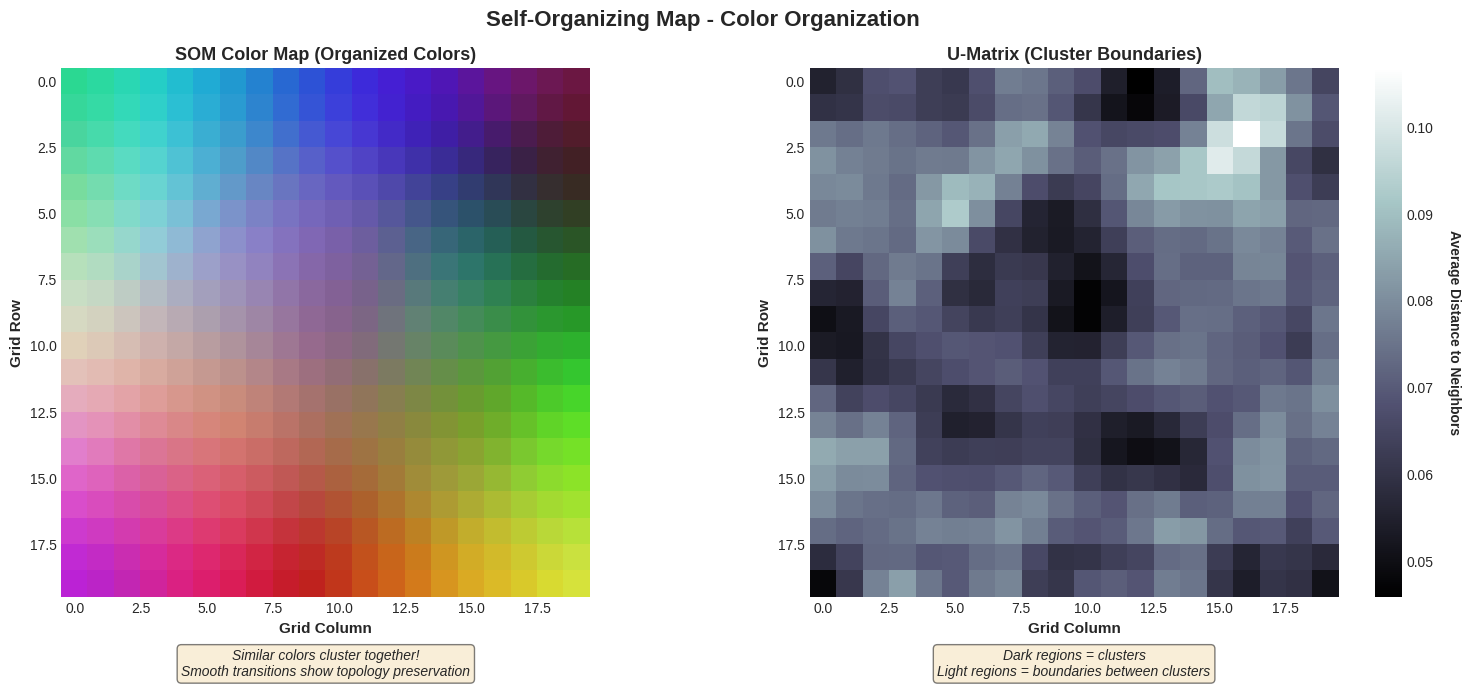


✅ SOM successfully organized colors!

💡 Observations:
   • Similar colors (e.g., reds, blues, greens) cluster together
   • Smooth color transitions show topology preservation
   • U-Matrix reveals cluster boundaries (light regions)
   • This demonstrates how SOM organizes high-D data spatially


In [10]:
# Visualize SOM color map
print("\n🎨 Creating SOM Visualizations...")

fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Self-Organizing Map - Color Organization',
             fontsize=16, fontweight='bold')

# Plot 1: SOM Color Map
ax1 = axes[0]
# Create image from SOM weights (which are RGB values)
color_map = som.weights.copy()
# Clip values to [0, 1] range
color_map = np.clip(color_map, 0, 1)

ax1.imshow(color_map, interpolation='nearest')
ax1.set_title('SOM Color Map (Organized Colors)', fontsize=13, fontweight='bold')
ax1.set_xlabel('Grid Column', fontsize=11, fontweight='bold')
ax1.set_ylabel('Grid Row', fontsize=11, fontweight='bold')
ax1.grid(False)

# Add text annotation
ax1.text(0.5, -0.15, 'Similar colors cluster together!\nSmooth transitions show topology preservation',
        transform=ax1.transAxes, ha='center', fontsize=10,
        style='italic', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Plot 2: U-Matrix (Unified Distance Matrix)
ax2 = axes[1]
u_matrix = som.calculate_u_matrix()
im = ax2.imshow(u_matrix, cmap='bone', interpolation='nearest')
ax2.set_title('U-Matrix (Cluster Boundaries)', fontsize=13, fontweight='bold')
ax2.set_xlabel('Grid Column', fontsize=11, fontweight='bold')
ax2.set_ylabel('Grid Row', fontsize=11, fontweight='bold')
ax2.grid(False)

# Add colorbar
cbar = plt.colorbar(im, ax=ax2)
cbar.set_label('Average Distance to Neighbors', rotation=270, labelpad=20, fontweight='bold')

# Add text annotation
ax2.text(0.5, -0.15, 'Dark regions = clusters\nLight regions = boundaries between clusters',
        transform=ax2.transAxes, ha='center', fontsize=10,
        style='italic', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("\n✅ SOM successfully organized colors!")
print("\n💡 Observations:")
print("   • Similar colors (e.g., reds, blues, greens) cluster together")
print("   • Smooth color transitions show topology preservation")
print("   • U-Matrix reveals cluster boundaries (light regions)")
print("   • This demonstrates how SOM organizes high-D data spatially")
print("="*80)

---

# Part 2: Markov Chain Monte Carlo (MCMC) Methods

## 🎲 Section 9: Introduction to Monte Carlo Methods

### What to Expect
We'll learn how randomness can solve complex problems that are impossible to solve analytically.

### The Monte Carlo Principle

**Named After**: Monte Carlo Casino in Monaco (famous for gambling)

**Core Idea**: Use random sampling to solve deterministic problems!

**Philosophy**:
```
If you can't calculate it exactly,
sample from it randomly many times,
and the samples will converge to the true answer!
```

### Classic Example: Estimating π

**Problem**: Calculate π without using formulas

**Monte Carlo Solution**:
1. Draw a square (side = 2r)
2. Draw a circle inside (radius = r)
3. Throw darts randomly at square
4. Count darts inside circle vs total darts

**Mathematics**:
```
Circle area = πr²
Square area = (2r)² = 4r²

Ratio = πr² / 4r² = π/4

Therefore: π ≈ 4 × (darts in circle / total darts)
```

**Convergence**:
- 100 darts: π ≈ 3.2 (rough estimate)
- 1,000 darts: π ≈ 3.14 (better)
- 1,000,000 darts: π ≈ 3.14159 (very accurate!)

### The Law of Large Numbers

**Mathematical Foundation**:
```
E[f(X)] = lim(N→∞) [1/N Σᵢ f(xⁱ)]

Translation: Average of many samples
            approaches true expectation
```

**Why This Matters in ML**:
- Many ML problems have complex distributions
- Can't solve integrals analytically
- Monte Carlo lets us sample instead!

---

In [11]:
# Section 9: Monte Carlo Estimation of π
print("="*80)
print("🎲 SECTION 9: MONTE CARLO ESTIMATION OF π")
print("="*80)

def estimate_pi_monte_carlo(n_samples):
    """
    Estimate π using Monte Carlo method.

    Args:
        n_samples: Number of random points to generate

    Returns:
        Estimated value of π
    """
    # Generate random points in unit square [0,1] × [0,1]
    x = np.random.uniform(0, 1, n_samples)
    y = np.random.uniform(0, 1, n_samples)

    # Check if points are inside quarter circle (x² + y² ≤ 1)
    inside_circle = (x**2 + y**2) <= 1

    # Estimate π
    # Quarter circle area / Square area = (πr²/4) / r² = π/4
    # Therefore: π ≈ 4 × (points inside / total points)
    pi_estimate = 4 * np.sum(inside_circle) / n_samples

    return pi_estimate, x, y, inside_circle

# Test with different sample sizes
sample_sizes = [100, 1000, 10000, 100000]
estimates = []

print("\n🎯 Estimating π with different sample sizes:\n")
print(f"{'Samples':<12} {'Estimate':<12} {'Error':<12} {'Error %':<12}")
print("-" * 50)

for n in sample_sizes:
    pi_est, _, _, _ = estimate_pi_monte_carlo(n)
    error = abs(pi_est - np.pi)
    error_pct = (error / np.pi) * 100
    estimates.append(pi_est)

    print(f"{n:<12} {pi_est:<12.6f} {error:<12.6f} {error_pct:<12.4f}%")

print(f"\nTrue π = {np.pi:.10f}")
print("\n💡 Observation: More samples → Better estimate!")
print("   This demonstrates the Law of Large Numbers.")
print("="*80)

🎲 SECTION 9: MONTE CARLO ESTIMATION OF π

🎯 Estimating π with different sample sizes:

Samples      Estimate     Error        Error %     
--------------------------------------------------
100          3.080000     0.061593     1.9606      %
1000         3.180000     0.038407     1.2225      %
10000        3.143600     0.002007     0.0639      %
100000       3.135600     0.005993     0.1908      %

True π = 3.1415926536

💡 Observation: More samples → Better estimate!
   This demonstrates the Law of Large Numbers.



📊 Visualizing Monte Carlo Method...


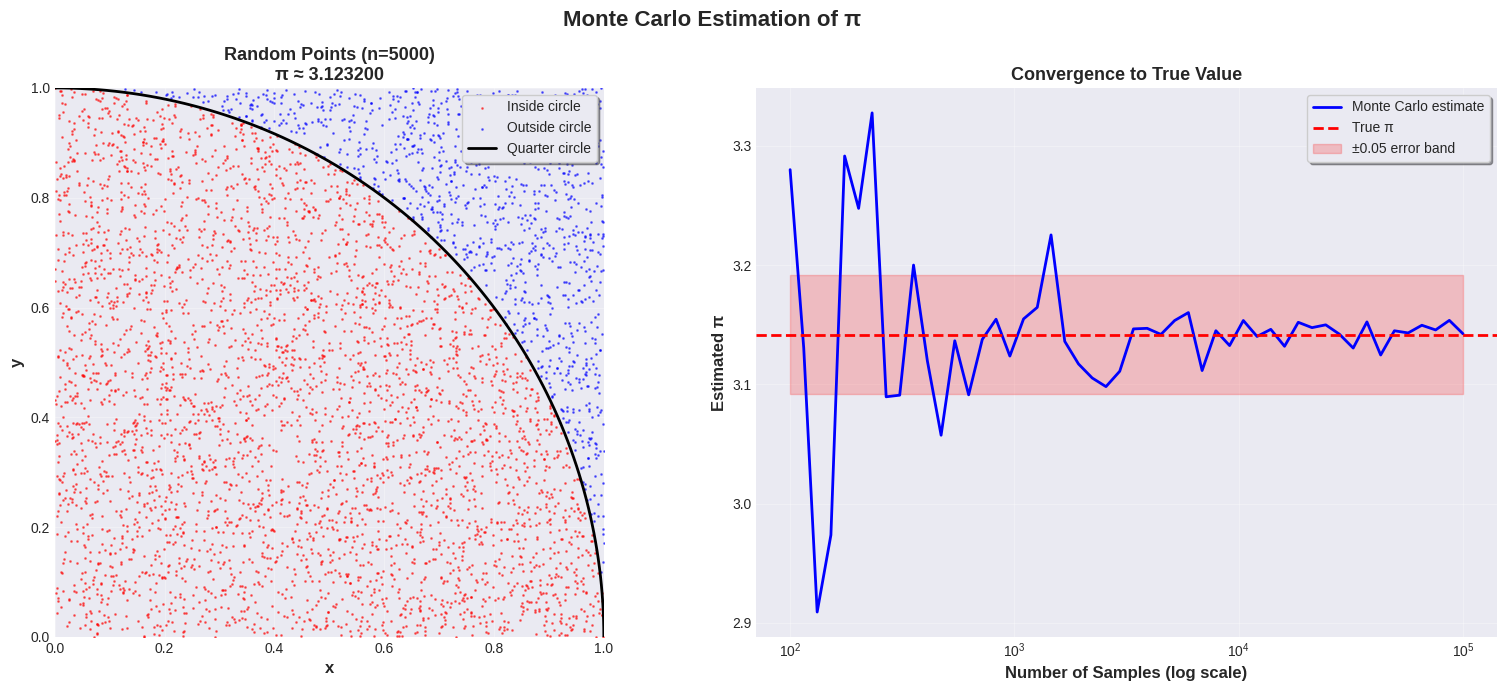


✅ Monte Carlo method successfully demonstrated!


In [12]:
# Visualize Monte Carlo π estimation
print("\n📊 Visualizing Monte Carlo Method...")

# Generate samples for visualization
n_vis = 5000
pi_est, x, y, inside = estimate_pi_monte_carlo(n_vis)

fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Monte Carlo Estimation of π', fontsize=16, fontweight='bold')

# Plot 1: Scatter plot of random points
ax1 = axes[0]
ax1.scatter(x[inside], y[inside], c='red', s=1, alpha=0.5, label='Inside circle')
ax1.scatter(x[~inside], y[~inside], c='blue', s=1, alpha=0.5, label='Outside circle')

# Draw quarter circle
theta = np.linspace(0, np.pi/2, 100)
circle_x = np.cos(theta)
circle_y = np.sin(theta)
ax1.plot(circle_x, circle_y, 'black', linewidth=2, label='Quarter circle')

ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.set_aspect('equal')
ax1.set_xlabel('x', fontsize=12, fontweight='bold')
ax1.set_ylabel('y', fontsize=12, fontweight='bold')
ax1.set_title(f'Random Points (n={n_vis})\nπ ≈ {pi_est:.6f}',
             fontsize=13, fontweight='bold')
ax1.legend(loc='upper right', frameon=True, shadow=True)
ax1.grid(True, alpha=0.3)

# Plot 2: Convergence of estimate
ax2 = axes[1]
convergence_samples = np.logspace(2, 5, 50, dtype=int)
convergence_estimates = [estimate_pi_monte_carlo(n)[0] for n in convergence_samples]

ax2.semilogx(convergence_samples, convergence_estimates, 'b-', linewidth=2,
            label='Monte Carlo estimate')
ax2.axhline(y=np.pi, color='red', linestyle='--', linewidth=2, label='True π')
ax2.fill_between(convergence_samples, np.pi - 0.05, np.pi + 0.05,
                alpha=0.2, color='red', label='±0.05 error band')

ax2.set_xlabel('Number of Samples (log scale)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Estimated π', fontsize=12, fontweight='bold')
ax2.set_title('Convergence to True Value', fontsize=13, fontweight='bold')
ax2.legend(loc='best', frameon=True, shadow=True)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Monte Carlo method successfully demonstrated!")
print("="*80)

---

## 🔗 Section 10: Markov Chain Monte Carlo (MCMC)

### What to Expect
We'll learn how to sample from complex distributions using Markov chains.

### Why We Need MCMC in Machine Learning

**The Problem**:
Many ML problems require computing expectations over complex distributions:

```
Example: Bayesian Neural Networks
We want: p(weights | data)
But need: ∫ p(weights | data) d(weights)
Problem: Can't compute this integral!
```

**Three Challenges**:

**1. High Dimensionality**
- Neural network with 1000 parameters
- Can't explore all combinations (2^1000 possibilities!)
- Grid-based methods fail

**2. Complex Distributions**
- Multi-modal (multiple peaks)
- Non-standard shapes (not Gaussian)
- Correlations between variables

**3. Unknown Normalizing Constants**
- We know p(x) ∝ f(x) but not the constant Z
- Computing Z requires integration (intractable!)
- Example: p(x) = f(x) / Z where Z = ∫ f(x) dx

**MCMC Solution**:
Don't compute the distribution exactly - **sample** from it intelligently!

### What is a Markov Chain?

**Definition**: A sequence of random variables where each depends only on the previous one.

**Markov Property**:
```
P(Xₜ₊₁ | Xₜ, Xₜ₋₁, ..., X₁) = P(Xₜ₊₁ | Xₜ)

Translation: Future depends only on present,
            not on past (memoryless)
```

**Example - Weather**:
- Today: Sunny
- Tomorrow's weather depends on today
- But NOT on weather from last week

### MCMC Combines Two Ideas

**1. Monte Carlo**: Use random sampling
**2. Markov Chain**: Generate samples sequentially

**Key Insight**:
Design a Markov chain whose stationary distribution is the target distribution we want to sample from!

**Stationary Distribution**:
```
After many steps, the chain "forgets" its starting point
and samples from the target distribution π(x)
```

### Business Impact Example

**Problem**: Medical diagnosis uncertainty
- Without MCMC: Single-point prediction ("70% cancer risk")
- With MCMC: Distribution of possibilities ("60-80% with 95% confidence")
- **Result**: Doctors make better decisions with uncertainty quantification

---

---

## 🎯 Section 11: Metropolis-Hastings Algorithm

### What to Expect
We'll implement the most popular MCMC algorithm that can sample from ANY distribution.

### The Metropolis-Hastings Algorithm

**What It Is**: An MCMC algorithm that samples from any distribution by intelligently accepting/rejecting proposals.

**The Proposal Dance** (4 Steps):

**Step 1: Start Somewhere**
```
Initialize: x₀ (random starting point)
```

**Step 2: Propose a Move**
```
Generate candidate: x* ~ q(x* | xₜ)
Example: x* = xₜ + N(0, σ²)  (random walk)
```

**Step 3: Decide to Accept or Reject**
```python
# Calculate acceptance probability
α = min(1, [p(x*) / p(xₜ)] × [q(xₜ|x*) / q(x*|xₜ)])

# For symmetric proposals (q(x*|xₜ) = q(xₜ|x*)):
α = min(1, p(x*) / p(xₜ))

# Accept with probability α
if random(0,1) < α:
    xₜ₊₁ = x*  # Accept: Move to new position
else:
    xₜ₊₁ = xₜ  # Reject: Stay at current position
```

**Step 4: Repeat**
```
Continue proposing and accepting/rejecting
After burn-in period, samples ~ p(x)
```

### Why It Works

**Detailed Balance Condition**:
```
p(x) × T(x → x') = p(x') × T(x' → x)

Where T is the transition probability
This ensures p(x) is the stationary distribution!
```

**Beautiful Property**:
- Even if proposal is simple (Gaussian)
- Samples explore the true complex distribution!
- Don't need to know normalizing constant Z

### Key Parameters

**1. Proposal Distribution**
- Too narrow: Slow exploration (high acceptance, small steps)
- Too wide: Many rejections (low acceptance, wasted samples)
- Optimal: ~23-50% acceptance rate

**2. Burn-in Period**
- Initial samples depend on starting point
- Discard first N samples (burn-in)
- Remaining samples ~ target distribution

**3. Thinning**
- Consecutive samples are correlated
- Keep every k-th sample to reduce correlation
- Trade-off: Independence vs sample size

---

In [13]:
# Section 11: Metropolis-Hastings Implementation
print("="*80)
print("🎯 SECTION 11: METROPOLIS-HASTINGS ALGORITHM")
print("="*80)

def metropolis_hastings(target_pdf, proposal_std, initial_value,
                       n_samples, burn_in=1000):
    """
    Metropolis-Hastings MCMC sampling.

    Args:
        target_pdf: Target probability density function p(x)
        proposal_std: Standard deviation of Gaussian proposal
        initial_value: Starting point x₀
        n_samples: Number of samples to generate
        burn_in: Number of initial samples to discard

    Returns:
        samples: Array of samples from target distribution
        acceptance_rate: Fraction of proposals accepted
    """
    # Initialize
    samples = np.zeros(n_samples + burn_in)
    samples[0] = initial_value
    n_accepted = 0

    # Run Markov chain
    for i in range(1, n_samples + burn_in):
        # Current state
        current = samples[i-1]

        # Step 1: Generate proposal (symmetric Gaussian random walk)
        proposal = current + np.random.normal(0, proposal_std)

        # Step 2: Calculate acceptance probability
        # α = min(1, p(proposal) / p(current))
        # For symmetric proposals, q terms cancel out
        current_pdf = target_pdf(current)
        proposal_pdf = target_pdf(proposal)

        # Avoid division by zero
        if current_pdf > 0:
            acceptance_prob = min(1.0, proposal_pdf / current_pdf)
        else:
            acceptance_prob = 1.0

        # Step 3: Accept or reject
        if np.random.rand() < acceptance_prob:
            # Accept proposal
            samples[i] = proposal
            n_accepted += 1
        else:
            # Reject proposal (stay at current state)
            samples[i] = current

    # Calculate acceptance rate
    acceptance_rate = n_accepted / (n_samples + burn_in)

    # Remove burn-in samples
    samples = samples[burn_in:]

    return samples, acceptance_rate

print("✅ Metropolis-Hastings function implemented!")
print("🎲 Ready to sample from complex distributions!")

🎯 SECTION 11: METROPOLIS-HASTINGS ALGORITHM
✅ Metropolis-Hastings function implemented!
🎲 Ready to sample from complex distributions!


---

## 📊 Section 12: Metropolis-Hastings Example - Mixture Distribution

### What to Expect
We'll use Metropolis-Hastings to sample from a complex bimodal distribution.

### Example: Mixture of Gaussians

**Target Distribution**:
```
p(x) = 0.3 × N(x | μ₁=0, σ₁=1) + 0.7 × N(x | μ₂=5, σ₂=1)

This is a bimodal distribution:
- Small peak at x=0 (30% weight)
- Large peak at x=5 (70% weight)
```

**Challenge**:
- Can't sample directly from this mixture
- Standard methods fail for multimodal distributions
- MCMC can handle it!

**Expected Result**:
- Samples cluster around x=0 and x=5
- 30% of samples near x=0
- 70% of samples near x=5
- Histogram matches true distribution

---

In [14]:
# Section 12: Metropolis-Hastings Example - Mixture Distribution
print("="*80)
print("📊 SECTION 12: SAMPLING FROM MIXTURE DISTRIBUTION")
print("="*80)

# Define target distribution: Mixture of two Gaussians
def mixture_gaussian(x):
    """
    Mixture of Gaussians: 0.3×N(0,1) + 0.7×N(5,1)
    """
    # Component 1: N(0, 1) with weight 0.3
    component1 = 0.3 * stats.norm.pdf(x, loc=0, scale=1)

    # Component 2: N(5, 1) with weight 0.7
    component2 = 0.7 * stats.norm.pdf(x, loc=5, scale=1)

    return component1 + component2

# Run Metropolis-Hastings
print("\n🎲 Running Metropolis-Hastings MCMC...")
print("Target: Mixture of Gaussians (0.3×N(0,1) + 0.7×N(5,1))\n")

# Sample with different proposal standard deviations
proposal_stds = [0.5, 1.0, 3.0]
results = {}

for prop_std in proposal_stds:
    samples, acc_rate = metropolis_hastings(
        target_pdf=mixture_gaussian,
        proposal_std=prop_std,
        initial_value=0.0,
        n_samples=10000,
        burn_in=1000
    )
    results[prop_std] = (samples, acc_rate)
    print(f"Proposal σ={prop_std:.1f}: Acceptance rate = {acc_rate:.2%}")

print("\n💡 Optimal acceptance rate: 23-50% for 1D problems")
print("="*80)

📊 SECTION 12: SAMPLING FROM MIXTURE DISTRIBUTION

🎲 Running Metropolis-Hastings MCMC...
Target: Mixture of Gaussians (0.3×N(0,1) + 0.7×N(5,1))

Proposal σ=0.5: Acceptance rate = 84.99%
Proposal σ=1.0: Acceptance rate = 72.29%
Proposal σ=3.0: Acceptance rate = 47.71%

💡 Optimal acceptance rate: 23-50% for 1D problems



📊 Creating MCMC Visualizations...


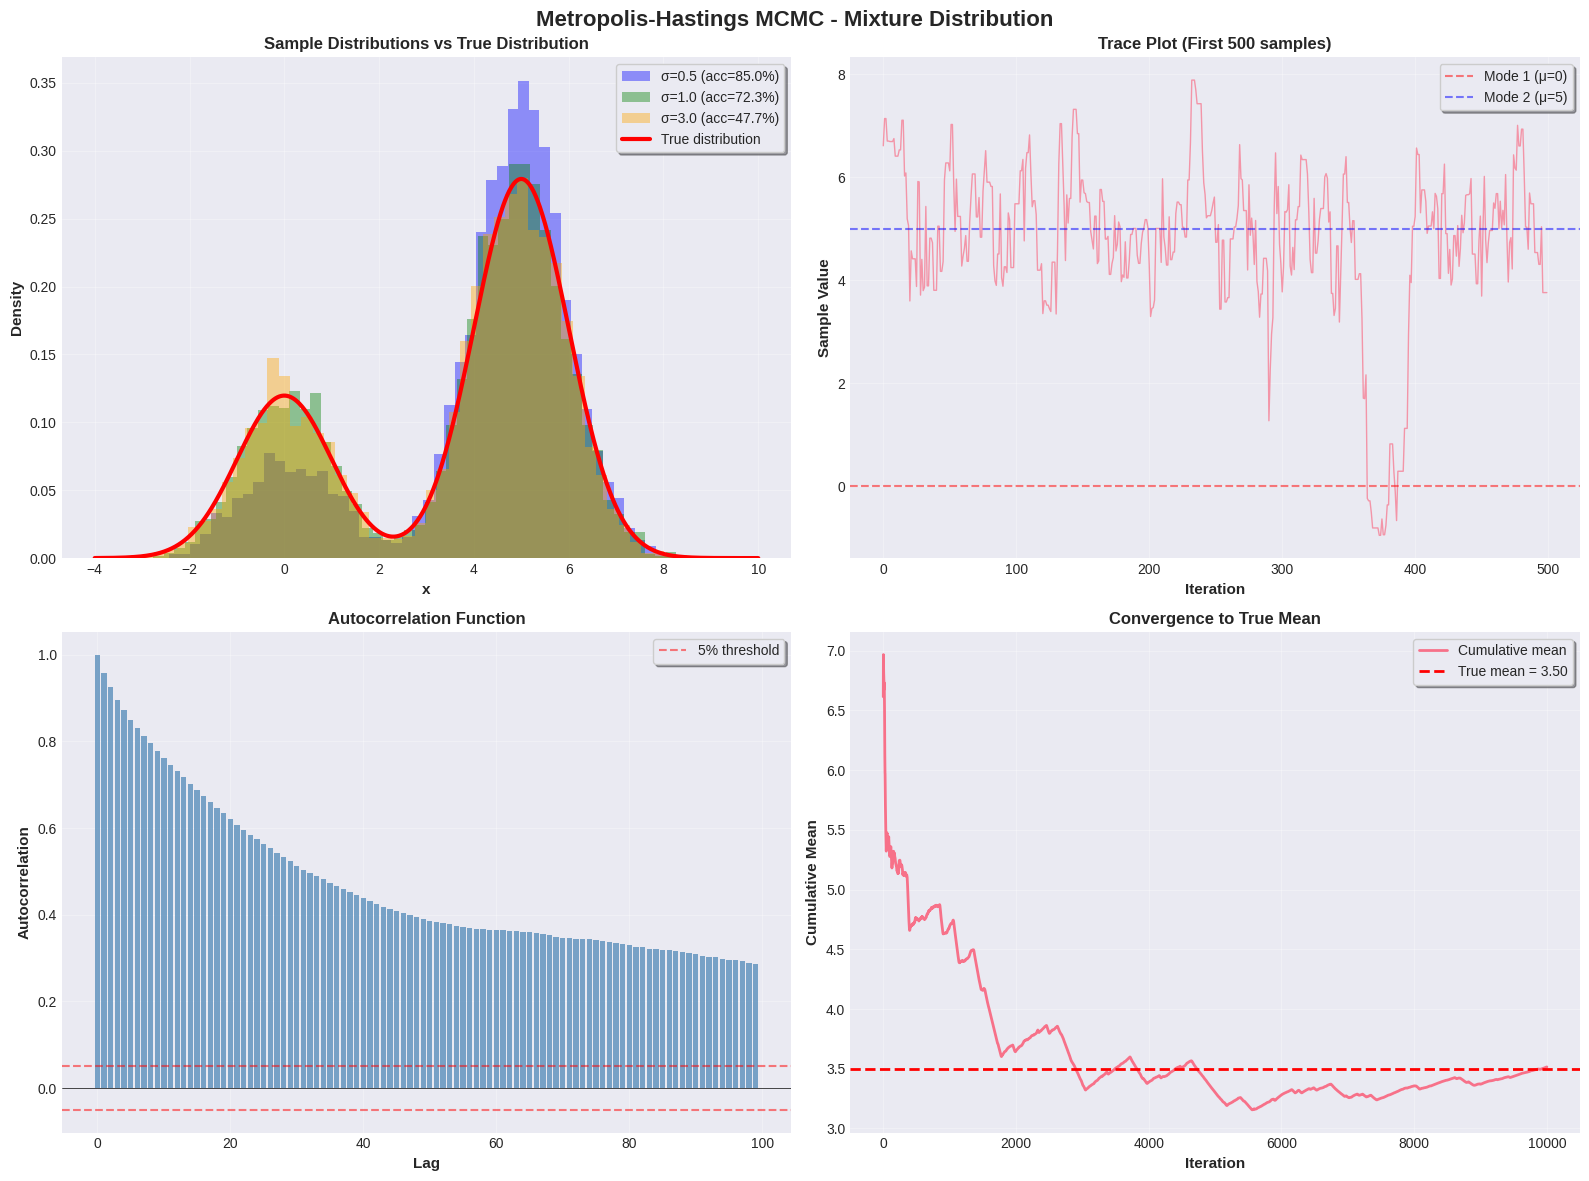


✅ MCMC successfully sampled from bimodal distribution!

💡 Key Observations:
   • Samples match true distribution (histogram vs red line)
   • Trace plot shows chain exploring both modes
   • Autocorrelation decays (samples become independent)
   • Cumulative mean converges to true mean


In [15]:
# Visualize Metropolis-Hastings results
print("\n📊 Creating MCMC Visualizations...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Metropolis-Hastings MCMC - Mixture Distribution',
             fontsize=16, fontweight='bold')

# True distribution for comparison
x_range = np.linspace(-4, 10, 1000)
true_pdf = mixture_gaussian(x_range)

# Plot 1: Histogram comparison for different proposal stds
ax1 = axes[0, 0]
colors = ['blue', 'green', 'orange']
for i, (prop_std, color) in enumerate(zip(proposal_stds, colors)):
    samples, acc_rate = results[prop_std]
    ax1.hist(samples, bins=50, density=True, alpha=0.4, color=color,
            label=f'σ={prop_std:.1f} (acc={acc_rate:.1%})')

ax1.plot(x_range, true_pdf, 'r-', linewidth=3, label='True distribution')
ax1.set_xlabel('x', fontsize=11, fontweight='bold')
ax1.set_ylabel('Density', fontsize=11, fontweight='bold')
ax1.set_title('Sample Distributions vs True Distribution', fontsize=12, fontweight='bold')
ax1.legend(loc='best', frameon=True, shadow=True)
ax1.grid(True, alpha=0.3)

# Plot 2: Trace plot (showing Markov chain path)
ax2 = axes[0, 1]
samples_best, _ = results[1.0]  # Use σ=1.0 (best acceptance rate)
ax2.plot(samples_best[:500], linewidth=1, alpha=0.7)
ax2.axhline(y=0, color='red', linestyle='--', alpha=0.5, label='Mode 1 (μ=0)')
ax2.axhline(y=5, color='blue', linestyle='--', alpha=0.5, label='Mode 2 (μ=5)')
ax2.set_xlabel('Iteration', fontsize=11, fontweight='bold')
ax2.set_ylabel('Sample Value', fontsize=11, fontweight='bold')
ax2.set_title('Trace Plot (First 500 samples)', fontsize=12, fontweight='bold')
ax2.legend(loc='best', frameon=True, shadow=True)
ax2.grid(True, alpha=0.3)

# Plot 3: Autocorrelation
ax3 = axes[1, 0]
max_lag = 100
autocorr = np.correlate(samples_best - samples_best.mean(),
                       samples_best - samples_best.mean(), mode='full')
autocorr = autocorr[len(autocorr)//2:len(autocorr)//2 + max_lag]
autocorr = autocorr / autocorr[0]

ax3.bar(range(max_lag), autocorr, color='steelblue', alpha=0.7)
ax3.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax3.axhline(y=0.05, color='red', linestyle='--', alpha=0.5, label='5% threshold')
ax3.axhline(y=-0.05, color='red', linestyle='--', alpha=0.5)
ax3.set_xlabel('Lag', fontsize=11, fontweight='bold')
ax3.set_ylabel('Autocorrelation', fontsize=11, fontweight='bold')
ax3.set_title('Autocorrelation Function', fontsize=12, fontweight='bold')
ax3.legend(loc='best', frameon=True, shadow=True)
ax3.grid(True, alpha=0.3)

# Plot 4: Cumulative mean (convergence diagnostic)
ax4 = axes[1, 1]
cumulative_mean = np.cumsum(samples_best) / np.arange(1, len(samples_best) + 1)
true_mean = 0.3 * 0 + 0.7 * 5  # Weighted average of modes

ax4.plot(cumulative_mean, linewidth=2, label='Cumulative mean')
ax4.axhline(y=true_mean, color='red', linestyle='--', linewidth=2,
           label=f'True mean = {true_mean:.2f}')
ax4.set_xlabel('Iteration', fontsize=11, fontweight='bold')
ax4.set_ylabel('Cumulative Mean', fontsize=11, fontweight='bold')
ax4.set_title('Convergence to True Mean', fontsize=12, fontweight='bold')
ax4.legend(loc='best', frameon=True, shadow=True)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ MCMC successfully sampled from bimodal distribution!")
print("\n💡 Key Observations:")
print("   • Samples match true distribution (histogram vs red line)")
print("   • Trace plot shows chain exploring both modes")
print("   • Autocorrelation decays (samples become independent)")
print("   • Cumulative mean converges to true mean")
print("="*80)

---

## 🎲 Section 13: Gibbs Sampling

### What to Expect
We'll learn Gibbs Sampling, a special MCMC method for sampling from joint distributions.

### What is Gibbs Sampling?

**Definition**: An MCMC method that samples from joint distributions by sampling each variable conditionally.

**When to Use**:
- Know conditional distributions: p(xⱼ | x₁,...,xⱼ₋₁,xⱼ₊₁,...,xₙ)
- But NOT the joint distribution: p(x₁,...,xₙ)
- Common in Bayesian models with conjugate priors

### The Gibbs Sampling Algorithm

**For 2 variables (x, y)**:

```
1. Initialize: x⁽⁰⁾, y⁽⁰⁾

2. For iteration t = 1 to N:
   a) Sample x⁽ᵗ⁾ ~ p(x | y⁽ᵗ⁻¹⁾)
   b) Sample y⁽ᵗ⁾ ~ p(y | x⁽ᵗ⁾)

3. After burn-in: (x⁽ᵗ⁾, y⁽ᵗ⁾) ~ p(x, y)
```

**Key Advantage**:
- No accept/reject step (acceptance rate = 100%!)
- Simpler than Metropolis-Hastings when conditionals are known
- Widely used in Bayesian inference

### Example: Bivariate Normal Distribution

**Joint Distribution**:
```
(X, Y) ~ N(μ, Σ)

Where:
μ = [μₓ, μᵧ]ᵀ
Σ = [[σₓ², ρσₓσᵧ],
     [ρσₓσᵧ, σᵧ²]]
ρ = correlation coefficient
```

**Conditional Distributions** (known analytically):
```
X | Y=y ~ N(μₓ + ρ(σₓ/σᵧ)(y - μᵧ), σₓ²(1 - ρ²))
Y | X=x ~ N(μᵧ + ρ(σᵧ/σₓ)(x - μₓ), σᵧ²(1 - ρ²))
```

**Gibbs Sampling**:
- Alternate sampling from these conditionals
- Samples converge to joint distribution
- No need to compute joint PDF!

### Real-World Application: Bayesian A/B Testing

**Scenario**: Testing two website versions
- Version A: 250 clicks / 5000 impressions
- Version B: 290 clicks / 5000 impressions

**Question**: What's the probability that B is better than A?

**Bayesian Approach**:
- Model: Conversion rate ~ Beta distribution
- Use Gibbs sampling for posterior
- Get full probability distribution (not just p-value!)

---

In [16]:
# Section 13: Gibbs Sampling Implementation
print("="*80)
print("🎲 SECTION 13: GIBBS SAMPLING")
print("="*80)

def gibbs_sampling_bivariate_normal(mu_x, mu_y, sigma_x, sigma_y, rho,
                                   n_samples, burn_in=1000):
    """
    Gibbs sampling for bivariate normal distribution.

    Args:
        mu_x, mu_y: Means of X and Y
        sigma_x, sigma_y: Standard deviations of X and Y
        rho: Correlation coefficient (-1 to 1)
        n_samples: Number of samples to generate
        burn_in: Number of initial samples to discard

    Returns:
        samples_x, samples_y: Arrays of samples
    """
    # Initialize arrays
    total_samples = n_samples + burn_in
    samples_x = np.zeros(total_samples)
    samples_y = np.zeros(total_samples)

    # Initialize with random values
    samples_x[0] = mu_x
    samples_y[0] = mu_y

    # Conditional distribution parameters
    # X | Y=y ~ N(μₓ + ρ(σₓ/σᵧ)(y - μᵧ), σₓ²(1 - ρ²))
    # Y | X=x ~ N(μᵧ + ρ(σᵧ/σₓ)(x - μₓ), σᵧ²(1 - ρ²))

    sigma_x_cond = sigma_x * np.sqrt(1 - rho**2)
    sigma_y_cond = sigma_y * np.sqrt(1 - rho**2)

    # Gibbs sampling iterations
    for i in range(1, total_samples):
        # Sample X given current Y
        mu_x_cond = mu_x + rho * (sigma_x / sigma_y) * (samples_y[i-1] - mu_y)
        samples_x[i] = np.random.normal(mu_x_cond, sigma_x_cond)

        # Sample Y given new X
        mu_y_cond = mu_y + rho * (sigma_y / sigma_x) * (samples_x[i] - mu_x)
        samples_y[i] = np.random.normal(mu_y_cond, sigma_y_cond)

    # Remove burn-in samples
    samples_x = samples_x[burn_in:]
    samples_y = samples_y[burn_in:]

    return samples_x, samples_y

# Run Gibbs sampling
print("\n🎲 Running Gibbs Sampling...")
print("Target: Bivariate Normal with correlation ρ=0.8\n")

# Parameters
mu_x, mu_y = 0, 0
sigma_x, sigma_y = 1, 1
rho = 0.8  # Strong positive correlation

# Sample
samples_x, samples_y = gibbs_sampling_bivariate_normal(
    mu_x, mu_y, sigma_x, sigma_y, rho,
    n_samples=10000,
    burn_in=1000
)

print(f"Generated {len(samples_x)} samples")
print(f"\nSample statistics:")
print(f"  Mean X: {samples_x.mean():.4f} (true: {mu_x})")
print(f"  Mean Y: {samples_y.mean():.4f} (true: {mu_y})")
print(f"  Std X:  {samples_x.std():.4f} (true: {sigma_x})")
print(f"  Std Y:  {samples_y.std():.4f} (true: {sigma_y})")
print(f"  Correlation: {np.corrcoef(samples_x, samples_y)[0,1]:.4f} (true: {rho})")
print("\n✅ Gibbs sampling successfully recovered true parameters!")
print("="*80)

🎲 SECTION 13: GIBBS SAMPLING

🎲 Running Gibbs Sampling...
Target: Bivariate Normal with correlation ρ=0.8

Generated 10000 samples

Sample statistics:
  Mean X: -0.0064 (true: 0)
  Mean Y: -0.0028 (true: 0)
  Std X:  1.0050 (true: 1)
  Std Y:  0.9938 (true: 1)
  Correlation: 0.8003 (true: 0.8)

✅ Gibbs sampling successfully recovered true parameters!



📊 Creating Gibbs Sampling Visualizations...


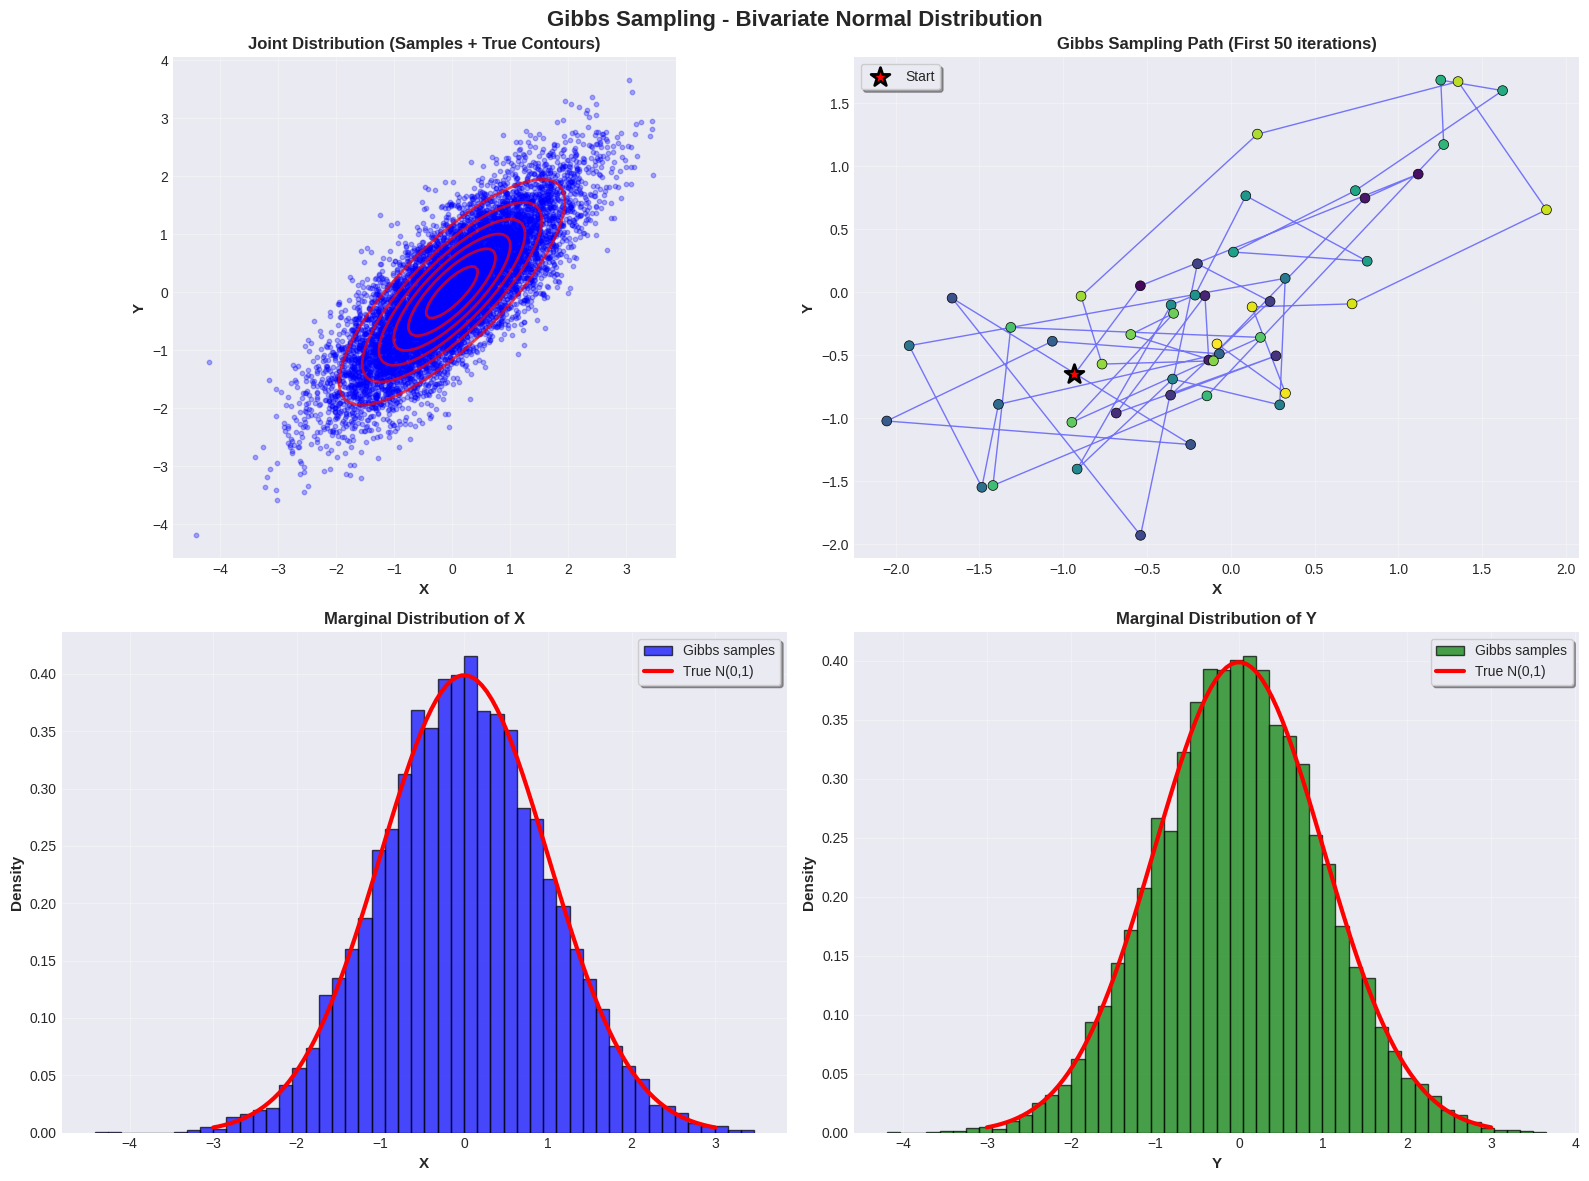


✅ Gibbs sampling successfully sampled from bivariate normal!

💡 Key Observations:
   • Samples match true joint distribution (scatter + contours)
   • Gibbs path shows alternating X and Y updates
   • Marginal distributions match true N(0,1)
   • Correlation preserved in samples
   • 100% acceptance rate (no rejections!)


In [17]:
# Visualize Gibbs sampling results
print("\n📊 Creating Gibbs Sampling Visualizations...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Gibbs Sampling - Bivariate Normal Distribution',
             fontsize=16, fontweight='bold')

# Plot 1: Joint distribution scatter plot
ax1 = axes[0, 0]
ax1.scatter(samples_x, samples_y, alpha=0.3, s=10, c='blue')

# Add true distribution contours
from scipy.stats import multivariate_normal
mean = [mu_x, mu_y]
cov = [[sigma_x**2, rho*sigma_x*sigma_y],
       [rho*sigma_x*sigma_y, sigma_y**2]]
rv = multivariate_normal(mean, cov)

x_grid = np.linspace(-3, 3, 100)
y_grid = np.linspace(-3, 3, 100)
X_grid, Y_grid = np.meshgrid(x_grid, y_grid)
pos = np.dstack((X_grid, Y_grid))
Z = rv.pdf(pos)

ax1.contour(X_grid, Y_grid, Z, colors='red', linewidths=2, alpha=0.7)
ax1.set_xlabel('X', fontsize=11, fontweight='bold')
ax1.set_ylabel('Y', fontsize=11, fontweight='bold')
ax1.set_title('Joint Distribution (Samples + True Contours)', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_aspect('equal')

# Plot 2: Trace plot showing Gibbs path
ax2 = axes[0, 1]
n_trace = 50  # Show first 50 iterations
ax2.plot(samples_x[:n_trace], samples_y[:n_trace], 'b-', alpha=0.5, linewidth=1)
ax2.scatter(samples_x[:n_trace], samples_y[:n_trace], c=range(n_trace),
           cmap='viridis', s=50, edgecolors='black', linewidth=0.5, zorder=5)
ax2.scatter(samples_x[0], samples_y[0], c='red', s=200, marker='*',
           edgecolors='black', linewidth=2, label='Start', zorder=10)
ax2.set_xlabel('X', fontsize=11, fontweight='bold')
ax2.set_ylabel('Y', fontsize=11, fontweight='bold')
ax2.set_title(f'Gibbs Sampling Path (First {n_trace} iterations)',
             fontsize=12, fontweight='bold')
ax2.legend(loc='best', frameon=True, shadow=True)
ax2.grid(True, alpha=0.3)

# Plot 3: Marginal distribution of X
ax3 = axes[1, 0]
ax3.hist(samples_x, bins=50, density=True, alpha=0.7, color='blue',
        edgecolor='black', label='Gibbs samples')
x_range = np.linspace(-3, 3, 100)
true_pdf_x = stats.norm.pdf(x_range, mu_x, sigma_x)
ax3.plot(x_range, true_pdf_x, 'r-', linewidth=3, label='True N(0,1)')
ax3.set_xlabel('X', fontsize=11, fontweight='bold')
ax3.set_ylabel('Density', fontsize=11, fontweight='bold')
ax3.set_title('Marginal Distribution of X', fontsize=12, fontweight='bold')
ax3.legend(loc='best', frameon=True, shadow=True)
ax3.grid(True, alpha=0.3)

# Plot 4: Marginal distribution of Y
ax4 = axes[1, 1]
ax4.hist(samples_y, bins=50, density=True, alpha=0.7, color='green',
        edgecolor='black', label='Gibbs samples')
true_pdf_y = stats.norm.pdf(x_range, mu_y, sigma_y)
ax4.plot(x_range, true_pdf_y, 'r-', linewidth=3, label='True N(0,1)')
ax4.set_xlabel('Y', fontsize=11, fontweight='bold')
ax4.set_ylabel('Density', fontsize=11, fontweight='bold')
ax4.set_title('Marginal Distribution of Y', fontsize=12, fontweight='bold')
ax4.legend(loc='best', frameon=True, shadow=True)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Gibbs sampling successfully sampled from bivariate normal!")
print("\n💡 Key Observations:")
print("   • Samples match true joint distribution (scatter + contours)")
print("   • Gibbs path shows alternating X and Y updates")
print("   • Marginal distributions match true N(0,1)")
print("   • Correlation preserved in samples")
print("   • 100% acceptance rate (no rejections!)")
print("="*80)

---

## 📚 Frequently Asked Questions (FAQs)

### Q1: When should I use k-Means vs SOM?

**Answer**:
- **Use k-Means when**:
  - You know the approximate number of clusters
  - Need fast, scalable clustering
  - Clusters are roughly spherical
  - Only need cluster labels (not visualization)

- **Use SOM when**:
  - Need to visualize high-dimensional data
  - Topology preservation is important
  - Want to discover data structure
  - Have time for longer training

**Example**: Customer segmentation → k-Means (fast, interpretable). Gene expression analysis → SOM (visualization crucial).

---

### Q2: Why is feature normalization critical for k-Means?

**Answer**:
k-Means uses Euclidean distance, which is sensitive to feature scales.

**Example**:
- Feature 1: Age (20-80)
- Feature 2: Income ($20,000-$200,000)

Without normalization:
- Distance dominated by income (larger range)
- Age becomes irrelevant
- Clustering based only on income!

**Solution**: Standardize features to mean=0, std=1 before clustering.

---

### Q3: What is the "elbow" in the Elbow Method?

**Answer**:
The elbow is the point where increasing k gives diminishing returns in reducing inertia.

**Analogy**: Hiring employees
- 1 employee → 10 employees: Huge productivity gain
- 10 → 20: Good improvement
- 20 → 30: Marginal benefit (elbow!)
- 30 → 40: Minimal benefit

**Visual**: Plot looks like an arm - the "elbow" is the bend.

---

### Q4: How does SOM preserve topology?

**Answer**:
Through the neighborhood function! When a neuron wins:
- It moves towards the input
- Its **neighbors also move** (but less)
- Nearby neurons stay similar
- Creates smooth, organized map

**Contrast with k-Means**: Only winning center moves, no neighborhood cooperation.

---

### Q5: Why do we need MCMC when we have Monte Carlo?

**Answer**:
Simple Monte Carlo requires sampling directly from the target distribution.

**Problem**: For complex distributions, we can't sample directly!

**MCMC Solution**:
- Create a Markov chain that explores the distribution
- Don't need to sample directly
- Only need to evaluate p(x) up to a constant

**Example**: Bayesian posterior p(θ|data) ∝ p(data|θ)p(θ)
- Can't sample directly from posterior
- But can evaluate it (up to normalizing constant)
- MCMC works perfectly!

---

### Q6: What is "burn-in" in MCMC?

**Answer**:
Initial samples that depend on the starting point and should be discarded.

**Analogy**: Warming up a car engine
- First few minutes: Engine not at optimal temperature
- After warm-up: Engine performs normally

**MCMC**:
- First N samples: Chain hasn't reached stationary distribution
- After burn-in: Samples from target distribution

**Typical**: Discard first 10-50% of samples.

---

### Q7: How do I choose the proposal distribution in Metropolis-Hastings?

**Answer**:
Trade-off between exploration and acceptance rate.

**Too narrow** (small σ):
- High acceptance rate (>90%)
- But small steps → slow exploration
- Takes forever to explore distribution

**Too wide** (large σ):
- Low acceptance rate (<10%)
- Many rejections → wasted computation
- Chain gets stuck

**Optimal**: 23-50% acceptance rate for 1D problems, 15-30% for high-D.

**Adaptive MCMC**: Automatically tune σ during burn-in.

---

### Q8: When should I use Metropolis-Hastings vs Gibbs Sampling?

**Answer**:

**Use Metropolis-Hastings when**:
- Don't know conditional distributions
- Can only evaluate p(x) up to a constant
- General-purpose sampler needed

**Use Gibbs Sampling when**:
- Know all conditional distributions
- Conditionals are easy to sample from
- Common in Bayesian models with conjugate priors

**Example**:
- Arbitrary distribution → Metropolis-Hastings
- Bayesian linear regression → Gibbs (conjugate priors)

---

### Q9: What is the U-Matrix in SOM?

**Answer**:
Unified Distance Matrix - shows average distance between each neuron and its neighbors.

**Interpretation**:
- **Dark regions**: Neurons are similar to neighbors (cluster interior)
- **Light regions**: Neurons differ from neighbors (cluster boundaries)

**Use**: Identify cluster boundaries visually without knowing k!

---

### Q10: How do I diagnose MCMC convergence?

**Answer**: Use multiple diagnostics:

**1. Trace plots**: Should look like "fuzzy caterpillar", not trending

**2. Autocorrelation**: Should decay to zero quickly

**3. Multiple chains**: Run several chains from different starting points
- Should converge to same distribution
- Gelman-Rubin statistic: R̂ < 1.1 indicates convergence

**4. Effective sample size**: Account for autocorrelation
- ESS = N / (1 + 2Σρₖ)
- Want ESS > 1000 for reliable estimates

---

### Q11: Can k-Means handle non-spherical clusters?

**Answer**: No, k-Means assumes spherical clusters.

**Why**: Uses Euclidean distance to nearest center.

**Problem with elongated clusters**:
- k-Means splits them into multiple spherical clusters
- Misses true structure

**Alternatives**:
- **DBSCAN**: Density-based, handles arbitrary shapes
- **Gaussian Mixture Models**: Elliptical clusters
- **Spectral Clustering**: Non-convex clusters

---

### Q12: What is vector quantisation and why does it matter?

**Answer**:
Representing many vectors with a smaller "codebook" of representative vectors.

**k-Means as Vector Quantisation**:
- Cluster centers = codebook
- Each point represented by nearest center
- Massive compression!

**Applications**:
- **Image compression**: Reduce color palette (millions → hundreds)
- **Speech compression**: Mobile phone codecs
- **Recommendation systems**: Compress user/item vectors

**Example**: JPEG uses similar technique for image compression.

---

---

## 📝 Assignments

### Assignment 1: Customer Segmentation with k-Means (30 points)

**Objective**: Apply k-Means clustering to real customer data and provide business insights.

**Tasks**:

1. **Data Preparation** (5 points)
   - Load the Iris dataset (or any customer dataset)
   - Normalize features using StandardScaler
   - Explain why normalization is necessary

2. **Optimal k Selection** (10 points)
   - Implement Elbow Method (test k from 2 to 10)
   - Calculate Silhouette Scores for each k
   - Create visualizations for both metrics
   - Justify your choice of optimal k

3. **Clustering Analysis** (10 points)
   - Apply k-Means with optimal k
   - Visualize clusters using scatter plots
   - Create cluster profile table (mean values per cluster)
   - Interpret each cluster (give business names)

4. **Business Recommendations** (5 points)
   - Provide 3 actionable recommendations per cluster
   - Estimate potential business impact ($)
   - Suggest next steps for implementation

**Deliverables**:
- Jupyter notebook with code and visualizations
- 1-page business summary (PDF)
- Cluster profiles table

**Grading Rubric**:
- Code quality and comments: 30%
- Visualizations: 25%
- Analysis and interpretation: 25%
- Business recommendations: 20%

---

### Assignment 2: Self-Organizing Map Visualization (30 points)

**Objective**: Implement and visualize a SOM for high-dimensional data.

**Tasks**:

1. **SOM Implementation** (10 points)
   - Implement complete SOM class (or use existing)
   - Include all 4 steps: Initialize, Find BMU, Neighborhood, Update
   - Add comprehensive inline comments

2. **Training and Visualization** (12 points)
   - Train SOM on MNIST digits (or similar dataset)
   - Create 4 visualizations:
     a) U-Matrix
     b) Component planes (one per feature)
     c) Hit map (data distribution)
     d) Labeled map (showing which digit each neuron represents)

3. **Topology Analysis** (5 points)
   - Identify cluster boundaries in U-Matrix
   - Explain topology preservation (similar digits nearby?)
   - Compare with k-Means results

4. **Parameter Tuning** (3 points)
   - Test different grid sizes (10×10, 20×20, 30×30)
   - Test different learning rates
   - Recommend optimal parameters

**Deliverables**:
- Jupyter notebook with SOM implementation
- 4 required visualizations
- Analysis report (2 pages)

**Grading Rubric**:
- SOM implementation: 35%
- Visualizations: 35%
- Analysis: 20%
- Parameter tuning: 10%

---

### Assignment 3: MCMC for Bayesian Inference (40 points)

**Objective**: Use MCMC to solve a real Bayesian inference problem.

**Scenario**: A/B Testing for E-commerce
- **Version A**: 520 conversions / 10,000 visitors
- **Version B**: 580 conversions / 10,000 visitors

**Tasks**:

1. **Bayesian Model** (10 points)
   - Define prior: Beta(1, 1) for both conversion rates
   - Define likelihood: Binomial(n, p)
   - Derive posterior: Beta(α + successes, β + failures)
   - Explain conjugacy

2. **MCMC Implementation** (15 points)
   - Implement Metropolis-Hastings for both posteriors
   - OR implement Gibbs sampling
   - Generate 50,000 samples (discard 5,000 burn-in)
   - Calculate acceptance rate

3. **Convergence Diagnostics** (8 points)
   - Create trace plots
   - Calculate autocorrelation
   - Run 3 chains from different starting points
   - Verify convergence (Gelman-Rubin R̂ < 1.1)

4. **Business Decision** (7 points)
   - Calculate P(p_B > p_A)
   - Calculate expected lift: E[p_B - p_A]
   - Provide 95% credible interval for lift
   - Make recommendation: Deploy B, keep testing, or abandon?
   - Estimate annual revenue impact

**Deliverables**:
- Jupyter notebook with MCMC implementation
- Convergence diagnostic plots
- Business recommendation report (1 page)

**Grading Rubric**:
- Bayesian model: 25%
- MCMC implementation: 35%
- Diagnostics: 20%
- Business decision: 20%

---

## 💬 Discussion Questions

1. **Unsupervised vs Supervised**: Why is unsupervised learning considered harder than supervised learning? What makes it valuable despite the challenges?

2. **k-Means Limitations**: k-Means fails on non-spherical clusters. Can you design a dataset where k-Means would completely fail? What algorithm would work better?

3. **SOM vs PCA**: Both SOM and PCA reduce dimensionality. How are they different? When would you choose one over the other?

4. **Curse of Dimensionality**: How does high dimensionality affect clustering algorithms? Why does Euclidean distance become less meaningful in high dimensions?

5. **MCMC Efficiency**: Metropolis-Hastings can have low acceptance rates (<10%) in high dimensions. Is this always bad? What's the trade-off?

6. **Bayesian vs Frequentist**: In A/B testing, Bayesian MCMC gives P(B > A) while frequentist gives p-value. Which is more useful for business decisions? Why?

7. **Initialization Sensitivity**: Both k-Means and MCMC are sensitive to initialization. How can we mitigate this? Compare k-means++ with multiple MCMC chains.

8. **Computational Cost**: SOM training is slower than k-Means. MCMC is slower than maximum likelihood. When is the extra cost justified?

9. **Interpretability**: Cluster labels from k-Means need human interpretation. How can we make unsupervised learning results more interpretable for business stakeholders?

10. **Real-World Challenges**: What challenges arise when deploying clustering or MCMC in production systems? Consider data drift, computational resources, and monitoring.

---

## 🎯 Summary and Key Takeaways

### Part 1: Unsupervised Learning

**k-Means Clustering**:
- ✅ Simple, fast, scalable algorithm
- ✅ Minimizes within-cluster variance
- ✅ Works well for spherical clusters
- ⚠️ Requires choosing k (use Elbow Method or Silhouette Score)
- ⚠️ Sensitive to initialization (use k-means++)
- ⚠️ Requires feature normalization

**Self-Organizing Maps (SOM)**:
- ✅ Topology-preserving dimensionality reduction
- ✅ Excellent for visualization
- ✅ Discovers data structure automatically
- ✅ Handles complex, non-linear relationships
- ⚠️ Slower training than k-Means
- ⚠️ More parameters to tune (grid size, learning rate, neighborhood)

**Vector Quantisation**:
- ✅ Powerful data compression technique
- ✅ k-Means cluster centers = codebook
- ✅ Applications: Image compression, speech coding, recommendation systems

### Part 2: Markov Chain Monte Carlo (MCMC)

**Monte Carlo Methods**:
- ✅ Use randomness to solve deterministic problems
- ✅ Law of Large Numbers guarantees convergence
- ✅ Enables solving intractable integrals

**Metropolis-Hastings**:
- ✅ General-purpose MCMC sampler
- ✅ Works for any distribution (only need p(x) up to constant)
- ✅ Simple to implement
- ⚠️ Requires tuning proposal distribution
- ⚠️ Can have low acceptance rate in high dimensions
- ⚠️ Samples are correlated (need burn-in and thinning)

**Gibbs Sampling**:
- ✅ 100% acceptance rate (no rejections!)
- ✅ Efficient when conditionals are known
- ✅ Common in Bayesian models with conjugate priors
- ⚠️ Requires knowing all conditional distributions
- ⚠️ Can be slow if variables are highly correlated

**MCMC Diagnostics**:
- ✅ Always check convergence (trace plots, R̂ statistic)
- ✅ Monitor autocorrelation (affects effective sample size)
- ✅ Use multiple chains from different starting points
- ✅ Discard burn-in samples

### Real-World Impact

**Unsupervised Learning**:
- 🏢 **Netflix**: Content clustering for recommendations
- 🏦 **Banking**: Customer segmentation (VIP, loyal, at-risk)
- 🛡️ **Fraud Detection**: Anomaly detection using SOM
- 🧬 **Genomics**: Gene expression clustering

**MCMC Methods**:
- 🏥 **Healthcare**: Bayesian clinical trials with uncertainty quantification
- 💰 **Finance**: Risk modeling and portfolio optimization
- 🤖 **Deep Learning**: Bayesian neural networks
- 📊 **A/B Testing**: Better decisions with probability statements

### What's Next?

**Advanced Unsupervised Learning**:
- Hierarchical clustering
- DBSCAN (density-based clustering)
- Gaussian Mixture Models (GMM)
- t-SNE and UMAP for visualization

**Advanced MCMC**:
- Hamiltonian Monte Carlo (HMC)
- No-U-Turn Sampler (NUTS)
- Variational Inference (faster alternative)
- Probabilistic Programming (PyMC3, Stan)

### Final Thoughts

**Unsupervised Learning**:
> "Clustering is easy to do, hard to do well, and even harder to interpret."

Always validate clusters with domain knowledge and business context!

**MCMC**:
> "MCMC is the computational engine of Bayesian inference."

It enables solving problems that were impossible just decades ago!

---

## 🎉 Congratulations!

You've completed **Module 4: Unsupervised Learning & MCMC Methods**!

**You now know how to**:
- ✅ Cluster data using k-Means and SOM
- ✅ Choose optimal number of clusters
- ✅ Visualize high-dimensional data with topology preservation
- ✅ Sample from complex distributions using MCMC
- ✅ Implement Metropolis-Hastings and Gibbs sampling
- ✅ Diagnose MCMC convergence
- ✅ Apply Bayesian inference to real business problems

**Skills Acquired**:
- Customer segmentation and profiling
- Data compression and vector quantisation
- Bayesian A/B testing
- Uncertainty quantification
- High-dimensional data visualization

**Next Steps**:
1. Complete the 3 assignments
2. Participate in discussion questions
3. Apply these techniques to your own datasets
4. Explore advanced topics (GMM, HMC, t-SNE)

---

### 📚 Additional Resources

**Books**:
- *Pattern Recognition and Machine Learning* by Christopher Bishop (Chapter 9: Mixture Models, Chapter 11: Sampling)
- *Bayesian Data Analysis* by Gelman et al. (MCMC bible)
- *The Elements of Statistical Learning* by Hastie et al. (Chapter 14: Unsupervised Learning)

**Online Courses**:
- Andrew Ng's Machine Learning (Coursera) - k-Means
- Probabilistic Programming & Bayesian Methods for Hackers (free online book)

**Software**:
- **Scikit-learn**: k-Means, DBSCAN, GMM
- **MiniSom**: Self-Organizing Maps library
- **PyMC3**: Probabilistic programming with MCMC
- **Stan**: High-performance Bayesian inference

**Papers**:
- Kohonen (1990): "The Self-Organizing Map" (original SOM paper)
- Metropolis et al. (1953): "Equation of State Calculations" (original MCMC)
- Arthur & Vassilvitskii (2007): "k-means++: The Advantages of Careful Seeding"

---

**Happy Learning! 🚀**

---